# Case Study Project - Travel Insurance

## Company Background

Travel Assured is a travel insurance company. Due to the COVID pandemic, they have had to
cut their marketing budget by over 50%. It is more important than ever that they advertise in
the right places and to the right people.
Travel Assured has plenty of data on their current customers as well as people who got
quotes but never bought insurance.

## Customer Question

- Are there differences in the travel habits between customers and non-customers?
- What is the typical profile of customers and non-customers?

|Column name        | Details                                                       |
|-------------------|---------------------------------------------------------------|
|Age                | Numeric, the customer’s age                                   |
|Employment         | Type Character, the sector of employment                      |
|GraduateOrNot      | Character, whether the customer is a college graduate         |
|AnnualIncome       | Numeric, the customer’s yearly income                         |
|FamilyMembers      | Numeric, the number of family members living with the customer|
|ChronicDiseases    | Numeric, whether the customer has any chronic conditions      |
|FrequentFlyer      | Character, whether a customer books frequent tickets          |
|EverTravelledAbroad| Character, has the customer ever travelled abroad             |
|TravelInsurance    | Numeric, whether the customer bought travel insurance         |

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr
import seaborn as sns
import statistics as st

In [2]:
df=pd.read_csv('travel_insurance.csv')
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


## Data Validation

In [4]:
# Checking for consistency at Age column

df.Age.describe()

count    1987.000000
mean       29.650226
std         2.913308
min        25.000000
25%        28.000000
50%        29.000000
75%        32.000000
max        35.000000
Name: Age, dtype: float64

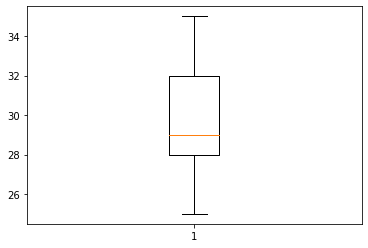

In [5]:
# Plotting a boxplot of Age Series

plt.boxplot(df.Age)
plt.show()

In [6]:
# Checking consistency's Employment Type Series

df.rename(columns = {'Employment Type':'EmploymentType'}, inplace = True)
df.EmploymentType.value_counts()

Private Sector/Self Employed    1417
Government Sector                570
Name: EmploymentType, dtype: int64

In [7]:
# Checking consistency's GraduateOrNot Series

df.GraduateOrNot.value_counts()

Yes    1692
No      295
Name: GraduateOrNot, dtype: int64

In [8]:
# Checking for consistency at AnnualIncome column

df.AnnualIncome.describe()

count    1.987000e+03
mean     9.327630e+05
std      3.768557e+05
min      3.000000e+05
25%      6.000000e+05
50%      9.000000e+05
75%      1.250000e+06
max      1.800000e+06
Name: AnnualIncome, dtype: float64

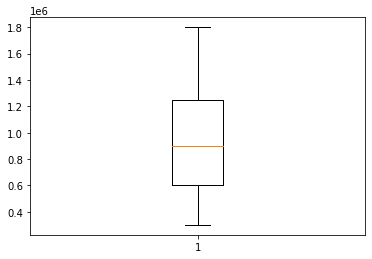

In [9]:
# Plotting a boxplot of AnnualIncome Series

plt.boxplot(df.AnnualIncome)
plt.show()

In [10]:
# Checking for consistency at AnnualIncome column

df.FamilyMembers.describe()

count    1987.000000
mean        4.752894
std         1.609650
min         2.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: FamilyMembers, dtype: float64

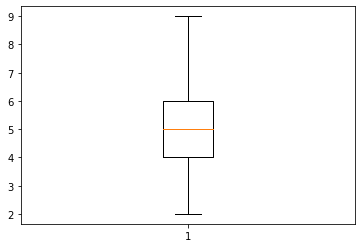

In [11]:
# Plotting a boxplot of FamilyMembers Series

plt.boxplot(df.FamilyMembers)
plt.show()

In [12]:
# Checking for consistency at ChronicDiseases column

df.ChronicDiseases.value_counts()

0    1435
1     552
Name: ChronicDiseases, dtype: int64

In [13]:
# Checking for consistency at FrequentFlyer column

df.FrequentFlyer.value_counts()

No     1570
Yes     417
Name: FrequentFlyer, dtype: int64

In [14]:
# Checking for consistency at EverTravelledAbroad column

df.EverTravelledAbroad.value_counts()

No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64

In [15]:
# Checking for consistency at TravelInsurance column

df.TravelInsurance.value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

## Data Discovering and Visualization

### Age

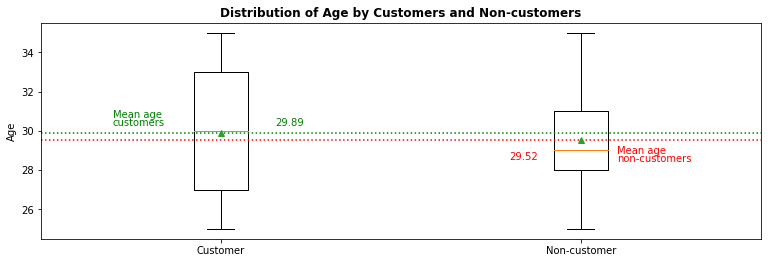

In [16]:
# Difference in Age between customers and non-customers

fig = plt.figure(figsize =(10, 3))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating two lists, for customers and non-customers
customers_age = list(df[df.TravelInsurance == 1].Age)
non_customers_age = list(df[df.TravelInsurance == 0].Age)

# Packing the two lists into one list of lists
data_age = [customers_age, non_customers_age] 

# Creating plot
bp = ax.boxplot(data_age, showmeans=True)

# Trendline for the mean age for customers
ax.axhline(y=np.mean(customers_age), color= 'green', linestyle=':')
plt.text(0.7,np.mean(customers_age)+0.8,"Mean age", color='green')
plt.text(0.7,np.mean(customers_age)+0.4,"customers", color='green')

# Value of the mean age for customers
plt.text(1.15,np.mean(customers_age)+0.4,round(np.mean(customers_age),2), color='green')

# Trendline for the mean age for non-customers
ax.axhline(y=np.mean(non_customers_age), color= 'red', linestyle=':')
plt.text(2.1,np.mean(non_customers_age)-0.7,"Mean age", color='red')
plt.text(2.1,np.mean(non_customers_age)-1.1,"non-customers", color='red')

# Value of the mean age for non-customers
plt.text(1.8,np.mean(non_customers_age)-1,round(np.mean(non_customers_age),2), color='red')

# Setting title and labels
ax.set_xticklabels(['Customer','Non-customer'])
ax.set_title('Distribution of Age by Customers and Non-customers', fontweight='bold')
ax.set_ylabel('Age')
    
# showing plot
plt.show()


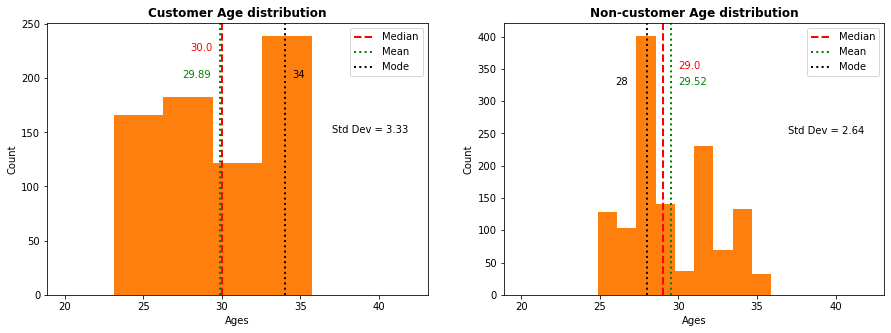

In [17]:
# Age distribution between customers and non-customers

# Establishing grid for subplots
f, axis = plt.subplots(1,2, figsize=(15,5))

# Plotting a customer age distribution
plt.subplot(1,2,1)

# Defining Age customers data
customers_age = list(df[df.TravelInsurance == 1].Age)

# Freedman-Diaconis rule to find number of bins
q1_cust_age = np.quantile(customers_age, 0.25)
q3_cust_age = np.quantile(customers_age, 0.75)
iqr_cust_age = q3_cust_age - q1_cust_age
bin_width_cust_age = (2 * iqr_cust_age) / (len(customers_age) ** (1 / 3))
bin_count_cust_age = int(np.ceil(max(customers_age) - min(customers_age)) / bin_width_cust_age)

# Plotting distribution
plt.hist(customers_age, bins=bin_count_cust_age, 
         range=(min(customers_age)-(0.2*min(customers_age)),max(customers_age)+(0.2*max(customers_age))),
         color='tab:orange')

# Adding trend line of the Median
plt.axvline(x=np.quantile(customers_age,0.5), color= 'red', linestyle='--', label='Median', lw = 2)
plt.text(28,225,np.quantile(customers_age,0.5), fontsize='medium', fontweight='book', color='red')

# Adding trend line of the Mean
plt.axvline(x=np.mean(customers_age), color= 'green', linestyle=':', label='Mean', lw = 2)
plt.text(27.5,200,round(np.mean(customers_age),2), fontsize='medium', fontweight='book', color='green')

# Adding trend line of the Mode
plt.axvline(x=st.mode(customers_age), color= 'black', linestyle=':', label='Mode', lw = 2)
plt.text(34.5,200,round(st.mode(customers_age),2), fontsize='medium', fontweight='book')

# Adding Std Dev
plt.text(37,150,"Std Dev = " + str(round(np.std(customers_age),2)), fontsize='medium', fontweight='book')

# Setting title and labels
plt.title("Customer Age distribution", fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Ages')
plt.legend()

# Plotting a non-customer age distribution
plt.subplot(1,2,2)

# Defining non-customers age data
non_customers_age = list(df[df.TravelInsurance == 0].Age)

# Freedman-Diaconis rule to find number of bins
q1_non_cust_age = np.quantile(non_customers_age, 0.25)
q3_non_cust_age = np.quantile(non_customers_age, 0.75)
iqr_non_cust_age = q3_non_cust_age - q1_non_cust_age
bin_width_non_cust_age = (2 * iqr_non_cust_age) / (len(non_customers_age) ** (1 / 3))
bin_count_non_cust_age = int(np.ceil(max(non_customers_age) - min(non_customers_age)) / bin_width_non_cust_age)

# Plotting distribution
plt.hist(non_customers_age, bins=bin_count_non_cust_age, 
         range=(min(non_customers_age)-(0.2*min(non_customers_age)),max(non_customers_age)+(0.2*max(non_customers_age))), 
         color='tab:orange')

# Adding trend line of the Median
plt.axvline(x=np.quantile(non_customers_age,0.5), color= 'red', linestyle='--', label='Median', lw = 2)
plt.text(30,350,np.quantile(non_customers_age,0.5), fontsize='medium', fontweight='book', color='red')

# Adding trend line of the Mean
plt.axvline(x=np.mean(non_customers_age), color= 'green', linestyle=':', label='Mean', lw = 2)
plt.text(30,325,round(np.mean(non_customers_age),2), fontsize='medium', fontweight='book', color='green')

# Adding trend line of the Mode
plt.axvline(x=st.mode(non_customers_age), color= 'black', linestyle=':', label='Mode', lw = 2)
plt.text(26,325,round(st.mode(non_customers_age),2), fontsize='medium', fontweight='book')

# Adding Std Dev
plt.text(37,250,"Std Dev = " + str(round(np.std(non_customers_age),2)), fontsize='medium', fontweight='book')

# Setting title and labels
plt.title("Non-customer Age distribution", fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Ages')
plt.legend()


# Showing plot
plt.show()

### Employment Type

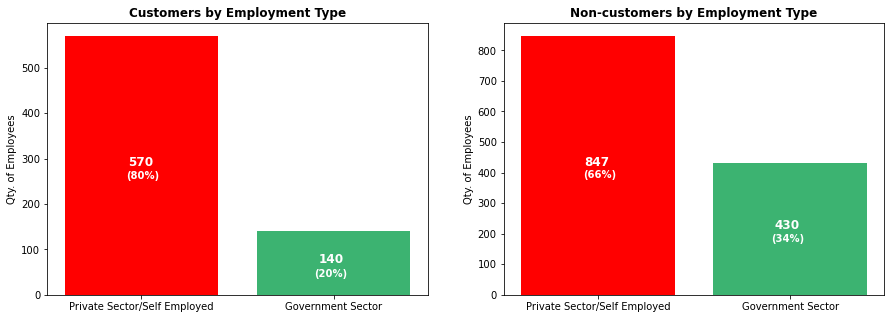

In [18]:
# Difference in Employment Type between customers and non-customers

f, axis = plt.subplots(1,2, figsize=(15,5))

# Plotting a customers by employment type barplot
plt.subplot(1,2,1)
plt.bar(df[df['TravelInsurance'] == 1].EmploymentType.value_counts().index[0],
        df[df['TravelInsurance'] == 1].EmploymentType.value_counts().values[0], 
        align='center', color='red')
plt.bar(df[df['TravelInsurance'] == 1].EmploymentType.value_counts().index[1],
        df[df['TravelInsurance'] == 1].EmploymentType.value_counts().values[1], 
        align='center', color='mediumseagreen')

# Setting titles and labels
plt.title("Customers by Employment Type", fontweight='bold')
plt.ylabel('Qty. of Employees')

# Value Private sector employees being customers
plt.text(x=-0.07,y=df[df['TravelInsurance'] == 1].EmploymentType.value_counts().values[0]/2,
         s=df[df['TravelInsurance'] == 1].EmploymentType.value_counts().values[0], 
         fontsize='large', fontweight='bold', color='w')
# Percentage for Private sector employees being customers
plt.text(x=-0.08,
         y=(df[df['TravelInsurance'] == 1].EmploymentType.value_counts().values[0]/2)-30,
         s="(" + str(round((df[df['TravelInsurance'] == 1].EmploymentType.value_counts().values[0]/df.TravelInsurance.value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# Value Goverment sector employees being customer
plt.text(x=.92,y=df[df['TravelInsurance'] == 1].EmploymentType.value_counts().values[1]/2,
         s=df[df['TravelInsurance'] == 1].EmploymentType.value_counts().values[1],
         fontsize='large', fontweight='bold', color='w')
# Percentage for Goverment sector employees being customer
plt.text(x=0.9,
         y=(df[df['TravelInsurance'] == 1].EmploymentType.value_counts().values[1]/2)-30,
         s="(" + str(round((df[df['TravelInsurance'] == 1].EmploymentType.value_counts().values[1]/df.TravelInsurance.value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# Plotting a non-customers by employment type barplot
plt.subplot(1,2,2)
plt.bar(df[df['TravelInsurance'] == 0].EmploymentType.value_counts().index[0],
        df[df['TravelInsurance'] == 0].EmploymentType.value_counts().values[0], 
        align='center', color='red')
plt.bar(df[df['TravelInsurance'] == 0].EmploymentType.value_counts().index[1],
        df[df['TravelInsurance'] == 0].EmploymentType.value_counts().values[1], 
        align='center', color='mediumseagreen')

# Setting titles and labels
plt.title("Non-customers by Employment Type", fontweight='bold')
plt.ylabel('Qty. of Employees')

# Value Private sector employees being non-customers
plt.text(x=-0.07,y=df[df['TravelInsurance'] == 0].EmploymentType.value_counts().values[0]/2,s=df[df['TravelInsurance'] == 0].EmploymentType.value_counts().values[0], 
         fontsize='large', fontweight='bold', color='w')
# Percentage for Private sector employees being non-customers
plt.text(x=-0.08,
         y=(df[df['TravelInsurance'] == 0].EmploymentType.value_counts().values[0]/2)-40,
         s="(" + str(round((df[df['TravelInsurance'] == 0].EmploymentType.value_counts().values[0]/df.TravelInsurance.value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# Value Goverment sector employees being non-customer
plt.text(x=.92,y=df[df['TravelInsurance'] == 0].EmploymentType.value_counts().values[1]/2,s=df[df['TravelInsurance'] == 0].EmploymentType.value_counts().values[1],
         fontsize='large', fontweight='bold', color='w')
# Percentage for Goverment sector employees being non-customer
plt.text(x=0.9,
         y=(df[df['TravelInsurance'] == 0].EmploymentType.value_counts().values[1]/2)-40,
         s="(" + str(round((df[df['TravelInsurance'] == 0].EmploymentType.value_counts().values[1]/df.TravelInsurance.value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')
    
# showing plot
plt.show()

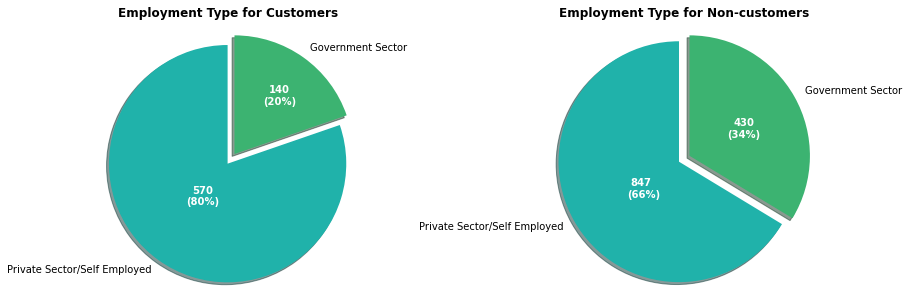

In [19]:
# Pie chart for employment type for travelers

f, axis = plt.subplots(1,2, figsize=(15,5))

# Plotting employment type for customers
plt.subplot(1,2,1)

# Defining values and categories from categorical data
sizes = df[df['TravelInsurance'] == 1].EmploymentType.value_counts().values
labels = ['Private Sector/Self Employed','Government Sector']

# Setting explode feature in pie-chart
explode=(0,0.1)

# Plotting pie-chart
plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90, colors=['lightseagreen', 'mediumseagreen'])

# Values inside the bars
plt.text(x=-0.3,
         y=-0.25,
         s=df[df['TravelInsurance'] == 1].EmploymentType.value_counts().values[0], 
         color='w', 
         fontweight='bold')
plt.text(x=0.35,
         y=0.6,
         s=df[df['TravelInsurance'] == 1].EmploymentType.value_counts().values[1], 
         color='w', 
         fontweight='bold')

# Percentages
plt.text(x=-0.35,
         y=-0.35,
         s="(" + str(round((df[df['TravelInsurance'] == 1].EmploymentType.value_counts().values[0]/df['TravelInsurance'].value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')
plt.text(x=0.3,
         y=0.5,
         s="(" + str(round((df[df['TravelInsurance'] == 1].EmploymentType.value_counts().values[1]/df['TravelInsurance'].value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Employment Type for Customers", fontweight='bold')
plt.axis('equal')  

#---------------------------------------------------------------------------

# Plotting  employment type for non-customers
plt.subplot(1,2,2)

# Defining values and categories from categorical data
sizes = df[df['TravelInsurance'] == 0].EmploymentType.value_counts().values
labels = ['Private Sector/Self Employed','Government Sector']

# Setting explode feature in pie-chart
explode=(0,0.1)

# Plotting pie-chart
plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90, colors=['lightseagreen', 'mediumseagreen'])

# Values inside the bars
plt.text(x=-0.4,
         y=-0.2,
         s=df[df['TravelInsurance'] == 0].EmploymentType.value_counts().values[0], 
         color='w', 
         fontweight='bold')
plt.text(x=0.45,
         y=0.3,
         s=df[df['TravelInsurance'] == 0].EmploymentType.value_counts().values[1], 
         color='w', 
         fontweight='bold')

# Percentages
plt.text(x=-0.43,
         y=-0.3,
         s="(" + str(round((df[df['TravelInsurance'] == 0].EmploymentType.value_counts().values[0]/df['TravelInsurance'].value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')
plt.text(x=0.4,
         y=0.2,
         s="(" + str(round((df[df['TravelInsurance'] == 0].EmploymentType.value_counts().values[1]/df['TravelInsurance'].value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Employment Type for Non-customers", fontweight='bold')
plt.axis('equal')

# Showing plot
plt.show()

### Graduated or Not

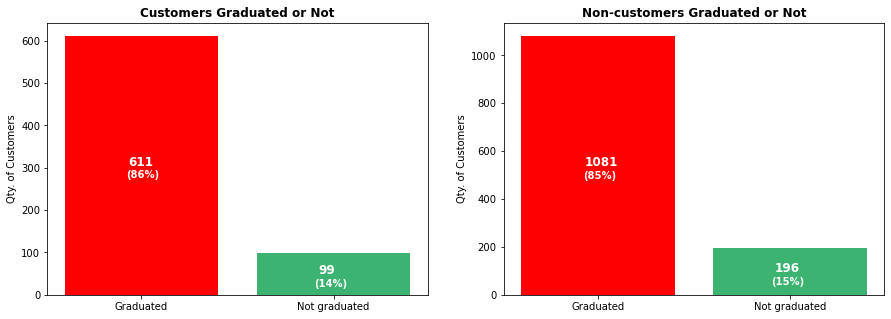

In [20]:
# Difference Graduated or Not between customers and non-customers

f, axis = plt.subplots(1,2, figsize=(15,5))

# Plotting a customers by graduated or not barplot
plt.subplot(1,2,1)
plt.bar('Graduated',
        df[df['TravelInsurance'] == 1].GraduateOrNot.value_counts().values[0], 
        align='center', color='red')
plt.bar('Not graduated',
        df[df['TravelInsurance'] == 1].GraduateOrNot.value_counts().values[1], 
        align='center', color='mediumseagreen')

# Setting titles and labels
plt.title("Customers Graduated or Not", fontweight='bold')
plt.ylabel('Qty. of Customers')

# Value for graduated customer
plt.text(x=-0.07,y=df[df['TravelInsurance'] == 1].GraduateOrNot.value_counts().values[0]/2,
         s=df[df['TravelInsurance'] == 1].GraduateOrNot.value_counts().values[0], 
         fontsize='large', fontweight='bold', color='w')
# Percentage for graduated customer
plt.text(x=-0.08,
         y=(df[df['TravelInsurance'] == 1].GraduateOrNot.value_counts().values[0]/2)-30,
         s="(" + str(round((df[df['TravelInsurance'] == 1].GraduateOrNot.value_counts().values[0]/df.TravelInsurance.value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# Value for not graduated customer
plt.text(x=.92,y=df[df['TravelInsurance'] == 1].GraduateOrNot.value_counts().values[1]/2,
         s=df[df['TravelInsurance'] == 1].GraduateOrNot.value_counts().values[1],
         fontsize='large', fontweight='bold', color='w')
# Percentage for not graduated customer
plt.text(x=0.9,
         y=(df[df['TravelInsurance'] == 1].GraduateOrNot.value_counts().values[1]/2)-30,
         s="(" + str(round((df[df['TravelInsurance'] == 1].GraduateOrNot.value_counts().values[1]/df.TravelInsurance.value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# Plotting a non-customers by graduated or not barplot
plt.subplot(1,2,2)
plt.bar('Graduated',
        df[df['TravelInsurance'] == 0].GraduateOrNot.value_counts().values[0], 
        align='center', color='red')
plt.bar('Not graduated',
        df[df['TravelInsurance'] == 0].GraduateOrNot.value_counts().values[1], 
        align='center', color='mediumseagreen')

# Setting titles and labels
plt.title("Non-customers Graduated or Not", fontweight='bold')
plt.ylabel('Qty. of Customers')

# Value for graduated non-customer
plt.text(x=-0.07,y=df[df['TravelInsurance'] == 0].GraduateOrNot.value_counts().values[0]/2,
         s=df[df['TravelInsurance'] == 0].GraduateOrNot.value_counts().values[0], 
         fontsize='large', fontweight='bold', color='w')
# Percentage for graduated customer
plt.text(x=-0.08,
         y=(df[df['TravelInsurance'] == 0].GraduateOrNot.value_counts().values[0]/2)-55,
         s="(" + str(round((df[df['TravelInsurance'] == 0].GraduateOrNot.value_counts().values[0]/df.TravelInsurance.value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# Value for not-graduated non-customer
plt.text(x=.92,y=df[df['TravelInsurance'] == 0].GraduateOrNot.value_counts().values[1]/2,
         s=df[df['TravelInsurance'] == 0].GraduateOrNot.value_counts().values[1],
         fontsize='large', fontweight='bold', color='w')
# Percentage for not graduated customer
plt.text(x=0.9,
         y=(df[df['TravelInsurance'] == 0].GraduateOrNot.value_counts().values[1]/2)-55,
         s="(" + str(round((df[df['TravelInsurance'] == 0].GraduateOrNot.value_counts().values[1]/df.TravelInsurance.value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')
    
# showing plot
plt.show()

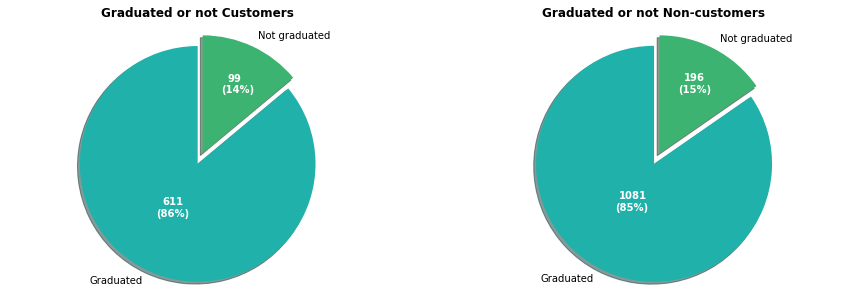

In [21]:
# Pie chart for travelers graduated or not

f, axis = plt.subplots(1,2, figsize=(15,5))

# Plotting a customers if they are graduated or not
plt.subplot(1,2,1)

# Defining values and categories from categorical data
sizes = df[df['TravelInsurance'] == 1].GraduateOrNot.value_counts().values
labels = ['Graduated','Not graduated']

# Setting explode feature in pie-chart
explode=(0,0.1)

# Plotting pie-chart
plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90, colors=['lightseagreen', 'mediumseagreen'])

# Values inside the bars
plt.text(x=-0.3,
         y=-0.35,
         s=df[df['TravelInsurance'] == 1].GraduateOrNot.value_counts().values[0], 
         color='w', 
         fontweight='bold')
plt.text(x=0.25,
         y=0.7,
         s=df[df['TravelInsurance'] == 1].GraduateOrNot.value_counts().values[1], 
         color='w', 
         fontweight='bold')

# Percentages
plt.text(x=-0.35,
         y=-0.45,
         s="(" + str(round((df[df['TravelInsurance'] == 1].GraduateOrNot.value_counts().values[0]/df['TravelInsurance'].value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')
plt.text(x=0.2,
         y=0.6,
         s="(" + str(round((df[df['TravelInsurance'] == 1].GraduateOrNot.value_counts().values[1]/df['TravelInsurance'].value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Graduated or not Customers", fontweight='bold')
plt.axis('equal')  

#---------------------------------------------------------------------------

# Plotting a non-customers if they are graduated or not
plt.subplot(1,2,2)

# Defining values and categories from categorical data
sizes = df[df['TravelInsurance'] == 0].GraduateOrNot.value_counts().values
labels = ['Graduated','Not graduated']

# Setting explode feature in pie-chart
explode=(0,0.1)

# Plotting pie-chart
plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90, colors=['lightseagreen', 'mediumseagreen'])

# Values inside the bars
plt.text(x=-0.3,
         y=-0.3,
         s=df[df['TravelInsurance'] == 0].GraduateOrNot.value_counts().values[0], 
         color='w', 
         fontweight='bold')
plt.text(x=0.25,
         y=0.7,
         s=df[df['TravelInsurance'] == 0].GraduateOrNot.value_counts().values[1], 
         color='w', 
         fontweight='bold')

# Percentages
plt.text(x=-0.33,
         y=-0.4,
         s="(" + str(round((df[df['TravelInsurance'] == 0].GraduateOrNot.value_counts().values[0]/df['TravelInsurance'].value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')
plt.text(x=0.2,
         y=0.6,
         s="(" + str(round((df[df['TravelInsurance'] == 0].GraduateOrNot.value_counts().values[1]/df['TravelInsurance'].value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Graduated or not Non-customers", fontweight='bold')
plt.axis('equal')

# Showing plot
plt.show()

### Annual Income

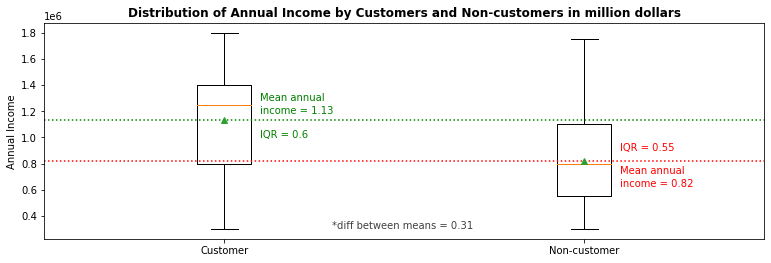

In [22]:
# Difference in Annual Income between customers and non-customers

fig = plt.figure(figsize =(10, 3))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
customers_income = list(df[df.TravelInsurance == 1].AnnualIncome)
non_customers_income = list(df[df.TravelInsurance == 0].AnnualIncome)
data = [customers_income, non_customers_income] 

# Creating both plots
bp = ax.boxplot(data, showmeans=True)

# Trendlines for customers
ax.axhline(y=np.mean(customers_income), color= 'green', linestyle=':')
# Showing the mean of customers
plt.text(1.1,np.mean(customers_income)+0.15e6,"Mean annual", color='green')
plt.text(1.1,np.mean(customers_income)+0.05e6,"income = " + str(round(np.mean(customers_income)/1e6,2)), 
         color='green')
# Showing IQR customers
plt.text(1.1,1e6,"IQR = " + str(round(iqr(customers_income)/1e6,2)), color='green')


# Trendlines for non-customers
ax.axhline(y=np.mean(non_customers_income), color= 'red', linestyle=':')
# Showing the mean of non-customers
plt.text(2.1,np.mean(non_customers_income)-0.1e6,"Mean annual", color='red')
plt.text(2.1,np.mean(non_customers_income)-.2e6,"income = " + str(round(np.mean(non_customers_income)/1e6,2)),
         color='red')
# Showing IQR non-customers
plt.text(2.1,0.9e6,"IQR = " + str(round(iqr(non_customers_income)/1e6,2)), color='red')

# Diff between means customers and non-customers
plt.text(1.3,0.3e6,"*diff between means = " + str(round(round(np.mean(customers_income)/1e6,2) - round(np.mean(non_customers_income)/1e6,2),2)), 
         color='black', alpha=0.75)

# Setting titles and labels
ax.set_xticklabels(['Customer','Non-customer'])
ax.set_title('Distribution of Annual Income by Customers and Non-customers in million dollars', fontweight='bold')
ax.set_ylabel('Annual Income')
    
# showing plot
plt.show()

### Familiy Members

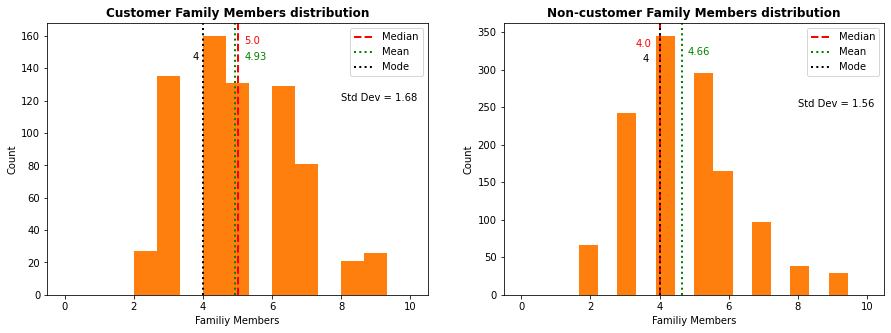

In [23]:
# Difference in Family Members between customers and non-customers

# Establishing grid for subplots
f, axis = plt.subplots(1,2, figsize=(15,5))

# Plotting a customer's familiy members distribution
plt.subplot(1,2,1)

# Defining customers Familiy Members data
customers_fam_mem = list(df[df.TravelInsurance == 1].FamilyMembers)

# Freedman-Diaconis rule to find number of bins
q1_cust_fam_mem = np.quantile(customers_fam_mem, 0.25)
q3_cust_fam_mem = np.quantile(customers_fam_mem, 0.75)
iqr_cust_fam_mem = q3_cust_fam_mem - q1_cust_fam_mem
bin_width_cust_fam_mem = (2 * iqr_cust_fam_mem) / (len(customers_fam_mem) ** (1 / 3))
bin_count_cust_fam_mem = int(np.ceil(max(customers_fam_mem) - min(customers_fam_mem)) / bin_width_cust_fam_mem)

# Plotting distribution
plt.hist(customers_fam_mem, bins=bin_count_cust_fam_mem, range=(0,10), color='tab:orange')

# Adding trend line of the Median
plt.axvline(x=np.quantile(customers_fam_mem,0.5), color= 'red', linestyle='--', label='Median', lw = 2)
plt.text(5.2,155,np.quantile(customers_fam_mem,0.5), fontsize='medium', fontweight='book', color='red')

# Adding trend line of the Mean
plt.axvline(x=np.mean(customers_fam_mem), color= 'green', linestyle=':', label='Mean', lw = 2)
plt.text(5.2,145,round(np.mean(customers_fam_mem),2), fontsize='medium', fontweight='book', color='green')

# Adding trend line of the Mode
plt.axvline(x=st.mode(customers_fam_mem), color= 'black', linestyle=':', label='Mode', lw = 2)
plt.text(3.7,145,round(st.mode(customers_fam_mem),2), fontsize='medium', fontweight='book')

# Adding Std Dev
plt.text(8,120,"Std Dev = " + str(round(np.std(customers_fam_mem),2)), fontsize='medium', fontweight='book')

# Setting title and labels
plt.title("Customer Family Members distribution", fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Familiy Members')
plt.legend()

# Plotting a non-customer's familiy members distribution
plt.subplot(1,2,2)

# Defining customers Familiy Members data
non_customers_fam_mem = list(df[df.TravelInsurance == 0].FamilyMembers)

# Freedman-Diaconis rule to find number of bins
q1_non_cust_fam_mem = np.quantile(non_customers_fam_mem, 0.25)
q3_non_cust_fam_mem = np.quantile(non_customers_fam_mem, 0.75)
iqr_non_cust_fam_mem = q3_non_cust_fam_mem - q1_non_cust_fam_mem
bin_width_non_cust_fam_mem = (2 * iqr_non_cust_fam_mem) / (len(non_customers_fam_mem) ** (1 / 3))
bin_count_non_cust_fam_mem = int(np.ceil(max(non_customers_fam_mem) - min(non_customers_fam_mem)) / bin_width_non_cust_fam_mem)

# Plotting distribution
plt.hist(non_customers_fam_mem, bins=bin_count_non_cust_fam_mem, range=(0,10), color='tab:orange')

# Adding trend line of the Median
plt.axvline(x=np.quantile(non_customers_fam_mem,0.5), color= 'red', linestyle='--', label='Median', lw = 2)
plt.text(3.3,330,np.quantile(non_customers_fam_mem,0.5), fontsize='medium', fontweight='book', color='red')

# Adding trend line of the Mean
plt.axvline(x=np.mean(non_customers_fam_mem), color= 'green', linestyle=':', label='Mean', lw = 2)
plt.text(4.8,320,round(np.mean(non_customers_fam_mem),2), fontsize='medium', fontweight='book', color='green')

# Adding trend line of the Mode
plt.axvline(x=st.mode(non_customers_fam_mem), color= 'black', linestyle=':', label='Mode', lw = 2)
plt.text(3.5,310,round(st.mode(non_customers_fam_mem),2), fontsize='medium', fontweight='book')

# Adding Std Dev
plt.text(8,250,"Std Dev = " + str(round(np.std(non_customers_fam_mem),2)), fontsize='medium', fontweight='book')

# Setting title and labels
plt.title("Non-customer Family Members distribution", fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Familiy Members')
plt.legend()

# Showing plot
plt.show()

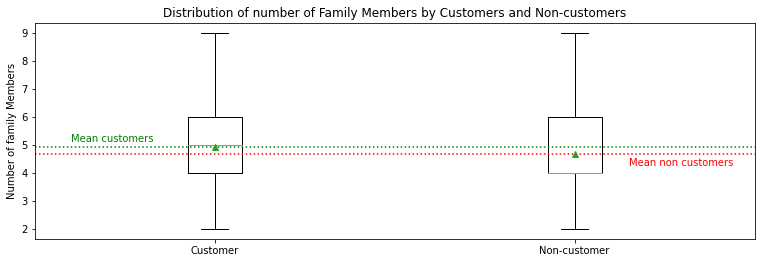

In [24]:
# Now creating a boxplots of Family Members distribution in both groups, customers and non-customers

fig = plt.figure(figsize =(10, 3))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
data = [customers_fam_mem, non_customers_fam_mem] 

# Creating both plots
bp = ax.boxplot(data, showmeans=True)

# Trendlines for customers
ax.axhline(y=np.mean(customers_fam_mem), color= 'green', linestyle=':')
# Showing the mean of customers
plt.text(0.6,np.mean(customers_fam_mem)+0.2,"Mean customers", color='green')

# Trendlines for non-customers
ax.axhline(y=np.mean(non_customers_fam_mem), color= 'red', linestyle=':')
# Showing the mean of non-customers
plt.text(2.15,np.mean(non_customers_fam_mem)-0.4,"Mean non customers", color='red')

# Setting titles and labels
ax.set_xticklabels(['Customer','Non-customer'])
ax.set_title('Distribution of number of Family Members by Customers and Non-customers')
ax.set_ylabel('Number of family Members')
    
# showing plot
plt.show()

### Chronic Diseases

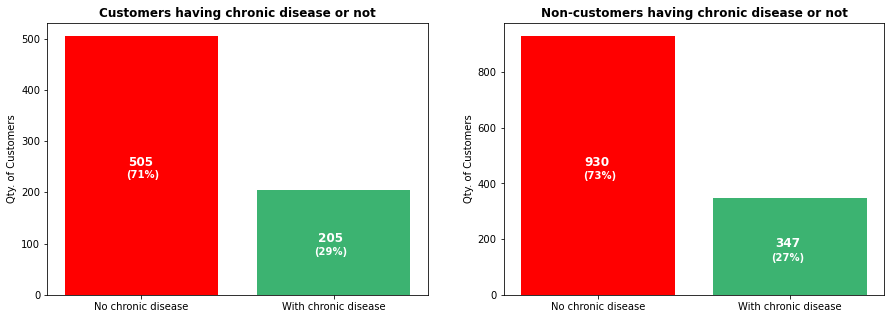

In [25]:
# Difference of have or not having a Chronic Disease between customers and non-customers

f, axis = plt.subplots(1,2, figsize=(15,5))

# Plotting a customers by having or not having a Chronic Disease barplot
plt.subplot(1,2,1)
plt.bar('No chronic disease',
        df[df['TravelInsurance'] == 1].ChronicDiseases.value_counts().values[0], 
        align='center', color='red')
plt.bar('With chronic disease',
        df[df['TravelInsurance'] == 1].ChronicDiseases.value_counts().values[1], 
        align='center', color='mediumseagreen')

# Setting titles and labels
plt.title("Customers having chronic disease or not", fontweight='bold')
plt.ylabel('Qty. of Customers')

# Value customers with no chronic disease
plt.text(x=-0.07,y=df[df['TravelInsurance'] == 1].ChronicDiseases.value_counts().values[0]/2,
         s=df[df['TravelInsurance'] == 1].ChronicDiseases.value_counts().values[0], 
         fontsize='large', fontweight='bold', color='w')
# Percentage customer with no chronic disease
plt.text(x=-0.08,
         y=(df[df['TravelInsurance'] == 1].ChronicDiseases.value_counts().values[0]/2)-25,
         s="(" + str(round((df[df['TravelInsurance'] == 1].ChronicDiseases.value_counts().values[0]/df.TravelInsurance.value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# Value customer with chronic disease
plt.text(x=.92,y=df[df['TravelInsurance'] == 1].ChronicDiseases.value_counts().values[1]/2,
         s=df[df['TravelInsurance'] == 1].ChronicDiseases.value_counts().values[1],
         fontsize='large', fontweight='bold', color='w')
# Percentage customer with chronic disease
plt.text(x=0.9,
         y=(df[df['TravelInsurance'] == 1].ChronicDiseases.value_counts().values[1]/2)-25,
         s="(" + str(round((df[df['TravelInsurance'] == 1].ChronicDiseases.value_counts().values[1]/df.TravelInsurance.value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# Plotting a non-customers by having or not having a Chronic Disease barplot
plt.subplot(1,2,2)
plt.bar('No chronic disease',
        df[df['TravelInsurance'] == 0].ChronicDiseases.value_counts().values[0], 
        align='center', color='red')
plt.bar('With chronic disease',
        df[df['TravelInsurance'] == 0].ChronicDiseases.value_counts().values[1], 
        align='center', color='mediumseagreen')

# Setting titles and labels
plt.title("Non-customers having chronic disease or not", fontweight='bold')
plt.ylabel('Qty. of Customers')

# Value non-customer with no chronic disease
plt.text(x=-0.07,y=df[df['TravelInsurance'] == 0].ChronicDiseases.value_counts().values[0]/2,
         s=df[df['TravelInsurance'] == 0].ChronicDiseases.value_counts().values[0], 
         fontsize='large', fontweight='bold', color='w')
# Percentage non-customer with no chronic disease
plt.text(x=-0.08,
         y=(df[df['TravelInsurance'] == 0].ChronicDiseases.value_counts().values[0]/2)-50,
         s="(" + str(round((df[df['TravelInsurance'] == 0].ChronicDiseases.value_counts().values[0]/df.TravelInsurance.value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# Value non-customer with chronic disease
plt.text(x=.92,y=df[df['TravelInsurance'] == 0].ChronicDiseases.value_counts().values[1]/2,
         s=df[df['TravelInsurance'] == 0].ChronicDiseases.value_counts().values[1],
         fontsize='large', fontweight='bold', color='w')
# Percentage non-customer with chronic disease
plt.text(x=0.9,
         y=(df[df['TravelInsurance'] == 0].ChronicDiseases.value_counts().values[1]/2)-50,
         s="(" + str(round((df[df['TravelInsurance'] == 0].ChronicDiseases.value_counts().values[1]/df.TravelInsurance.value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')
    
# showing plot
plt.show()

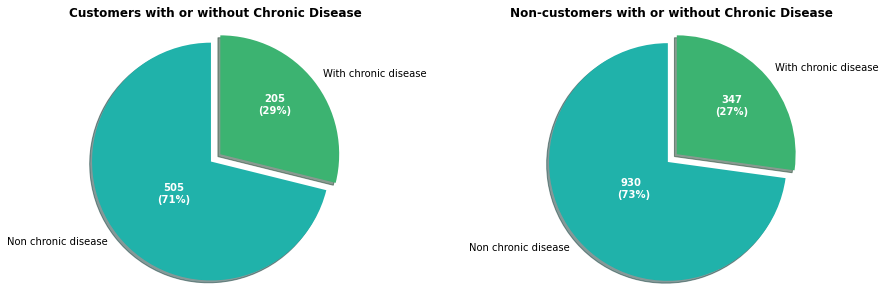

In [26]:
# Pie chart for Chronic Disease

f, axis = plt.subplots(1,2, figsize=(15,5))

# Plotting having Chronic Disease or not for customers
plt.subplot(1,2,1)

# Defining values and categories from categorical data
sizes = df[df['TravelInsurance'] == 1].ChronicDiseases.value_counts().values
labels = ['Non chronic disease','With chronic disease']

# Setting explode feature in pie-chart
explode=(0,0.1)

# Plotting pie-chart
plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90, colors=['lightseagreen', 'mediumseagreen'])

# Values inside the bars
plt.text(x=-0.4,
         y=-0.25,
         s=df[df['TravelInsurance'] == 1].ChronicDiseases.value_counts().values[0], 
         color='w', 
         fontweight='bold')
plt.text(x=0.45,
         y=0.5,
         s=df[df['TravelInsurance'] == 1].ChronicDiseases.value_counts().values[1], 
         color='w', 
         fontweight='bold')

# Percentages
plt.text(x=-0.45,
         y=-0.35,
         s="(" + str(round((df[df['TravelInsurance'] == 1].ChronicDiseases.value_counts().values[0]/df['TravelInsurance'].value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')
plt.text(x=0.4,
         y=0.4,
         s="(" + str(round((df[df['TravelInsurance'] == 1].ChronicDiseases.value_counts().values[1]/df['TravelInsurance'].value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Customers with or without Chronic Disease", fontweight='bold')
plt.axis('equal')  

#---------------------------------------------------------------------------

# Plotting having Chronic Disease or not for non-customers 
plt.subplot(1,2,2)

# Defining values and categories from categorical data
sizes = df[df['TravelInsurance'] == 0].ChronicDiseases.value_counts().values
labels = ['Non chronic disease','With chronic disease']

# Setting explode feature in pie-chart
explode=(0,0.1)

# Plotting pie-chart
plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90, colors=['lightseagreen', 'mediumseagreen'])

# Values inside the bars
plt.text(x=-0.4,
         y=-0.2,
         s=df[df['TravelInsurance'] == 0].ChronicDiseases.value_counts().values[0], 
         color='w', 
         fontweight='bold')
plt.text(x=0.45,
         y=0.5,
         s=df[df['TravelInsurance'] == 0].ChronicDiseases.value_counts().values[1], 
         color='w', 
         fontweight='bold')

# Percentages
plt.text(x=-0.43,
         y=-0.3,
         s="(" + str(round((df[df['TravelInsurance'] == 0].ChronicDiseases.value_counts().values[0]/df['TravelInsurance'].value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')
plt.text(x=0.4,
         y=0.4,
         s="(" + str(round((df[df['TravelInsurance'] == 0].ChronicDiseases.value_counts().values[1]/df['TravelInsurance'].value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Non-customers with or without Chronic Disease", fontweight='bold')
plt.axis('equal')

# Showing plot
plt.show()

## Are there differences in the travel habits between customers and non-customers?

#### There are three travel habits defined between customers and non-customers, these variables are Frequent flyer, Ever travelled abroad and Ever bought a travel insurance.

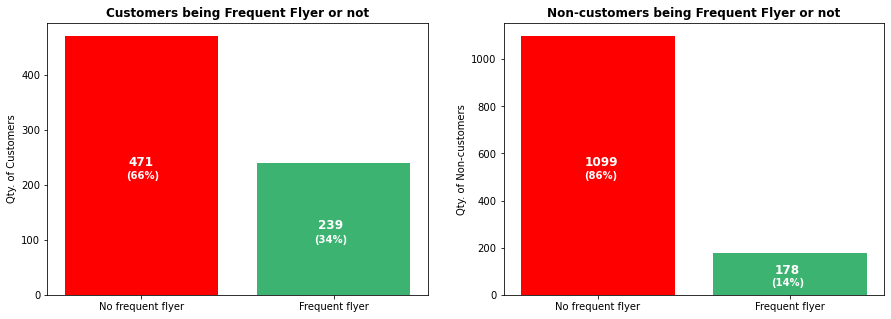

In [27]:
# Difference between customers and non-customers if they are Frequent Flyer or Not

f, axis = plt.subplots(1,2, figsize=(15,5))

# Plotting a customers if they are Frequent Flyer or Not barplot
plt.subplot(1,2,1)
plt.bar('No frequent flyer',
        df[df['TravelInsurance'] == 1].FrequentFlyer.value_counts().values[0], 
        align='center', color='red')
plt.bar('Frequent flyer',
        df[df['TravelInsurance'] == 1].FrequentFlyer.value_counts().values[1], 
        align='center', color='mediumseagreen')

# Setting titles and labels
plt.title("Customers being Frequent Flyer or not", fontweight='bold')
plt.ylabel('Qty. of Customers')

# Value customer not being frequent flyer
plt.text(x=-0.07,
         y=df[df['TravelInsurance'] == 1].FrequentFlyer.value_counts().values[0]/2,
         s=df[df['TravelInsurance'] == 1].FrequentFlyer.value_counts().values[0], 
         fontsize='large', fontweight='bold', color='w')
# Percentage customer not being frequent flyer
plt.text(x=-0.08,
         y=(df[df['TravelInsurance'] == 1].FrequentFlyer.value_counts().values[0]/2)-25,
         s="(" + str(round((df[df['TravelInsurance'] == 1].FrequentFlyer.value_counts().values[0]/df.TravelInsurance.value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')
# Value customer being frequent flyer
plt.text(x=.92,
         y=df[df['TravelInsurance'] == 1].FrequentFlyer.value_counts().values[1]/2,
         s=df[df['TravelInsurance'] == 1].FrequentFlyer.value_counts().values[1],
         fontsize='large', fontweight='bold', color='w')
# Percentage customer being frequent flyer
plt.text(x=0.9,
         y=(df[df['TravelInsurance'] == 1].FrequentFlyer.value_counts().values[1]/2)-25,
         s="(" + str(round((df[df['TravelInsurance'] == 1].FrequentFlyer.value_counts().values[1]/df.TravelInsurance.value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# Plotting a non-customers if they are Frequent Flyer or not barplot
plt.subplot(1,2,2)
plt.bar('No frequent flyer',
        df[df['TravelInsurance'] == 0].FrequentFlyer.value_counts().values[0], 
        align='center', color='red')
plt.bar('Frequent flyer',
        df[df['TravelInsurance'] == 0].FrequentFlyer.value_counts().values[1], 
        align='center', color='mediumseagreen')

# Setting titles and labels
plt.title("Non-customers being Frequent Flyer or not", fontweight='bold')
plt.ylabel('Qty. of Non-customers')

# Value non-customer not being frequent flyer
plt.text(x=-0.07,
         y=df[df['TravelInsurance'] == 0].FrequentFlyer.value_counts().values[0]/2,
         s=df[df['TravelInsurance'] == 0].FrequentFlyer.value_counts().values[0], 
         fontsize='large', fontweight='bold', color='w')
# Percentage non-customer not being frequent flyer
plt.text(x=-0.07,
         y=(df[df['TravelInsurance'] == 0].FrequentFlyer.value_counts().values[0]/2)-55,
         s="(" + str(round((df[df['TravelInsurance'] == 0].FrequentFlyer.value_counts().values[0]/df.TravelInsurance.value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# Value non-customer being frequent flyer
plt.text(x=.92,
         y=df[df['TravelInsurance'] == 0].FrequentFlyer.value_counts().values[1]/2,
         s=df[df['TravelInsurance'] == 0].FrequentFlyer.value_counts().values[1],
         fontsize='large', fontweight='bold', color='w')
# Percentage non-customer being frequent flyer
plt.text(x=0.9,
         y=(df[df['TravelInsurance'] == 0].FrequentFlyer.value_counts().values[1]/2)-50,
         s="(" + str(round((df[df['TravelInsurance'] == 0].FrequentFlyer.value_counts().values[1]/df.TravelInsurance.value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# showing plot
plt.show()

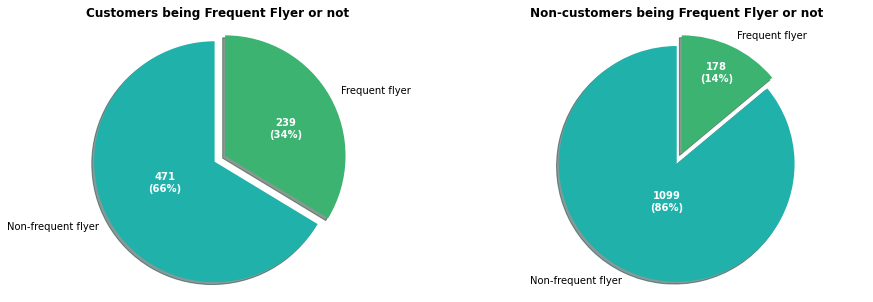

In [28]:
# Pie chart for Frequent flyers or not

f, axis = plt.subplots(1,2, figsize=(15,5))

# Plotting a Frequent flyer customers
plt.subplot(1,2,1)

# Defining values and categories from categorical data
sizes = df[df['TravelInsurance'] == 1].FrequentFlyer.value_counts().values
labels = ['Non-frequent flyer','Frequent flyer']

# Setting explode feature in pie-chart
explode=(0,0.1)

# Plotting pie-chart
plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90, colors=['lightseagreen', 'mediumseagreen'])

# Values inside the bars
plt.text(x=-0.5,
         y=-0.15,
         s=df[df['TravelInsurance'] == 1].FrequentFlyer.value_counts().values[0], 
         color='w', 
         fontweight='bold')
plt.text(x=0.5,
         y=0.3,
         s=df[df['TravelInsurance'] == 1].FrequentFlyer.value_counts().values[1], 
         color='w', 
         fontweight='bold')

# Percentages
plt.text(x=-0.55,
         y=-0.25,
         s="(" + str(round((df[df['TravelInsurance'] == 1].FrequentFlyer.value_counts().values[0]/df['TravelInsurance'].value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')
plt.text(x=0.45,
         y=0.2,
         s="(" + str(round((df[df['TravelInsurance'] == 1].FrequentFlyer.value_counts().values[1]/df['TravelInsurance'].value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Customers being Frequent Flyer or not ", fontweight='bold')
plt.axis('equal')  

#---------------------------------------------------------------------------

# Plotting a Frequent flyer non-customers 
plt.subplot(1,2,2)

# Defining values and categories from categorical data
sizes = df[df['TravelInsurance'] == 0].FrequentFlyer.value_counts().values
labels = ['Non-frequent flyer','Frequent flyer']

# Setting explode feature in pie-chart
explode=(0,0.1)

# Plotting pie-chart
plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90, colors=['lightseagreen', 'mediumseagreen'])

# Values inside the bars
plt.text(x=-0.2,
         y=-0.3,
         s=df[df['TravelInsurance'] == 0].FrequentFlyer.value_counts().values[0], 
         color='w', 
         fontweight='bold')
plt.text(x=0.25,
         y=0.8,
         s=df[df['TravelInsurance'] == 0].FrequentFlyer.value_counts().values[1], 
         color='w', 
         fontweight='bold')

# Percentages
plt.text(x=-0.23,
         y=-0.4,
         s="(" + str(round((df[df['TravelInsurance'] == 0].FrequentFlyer.value_counts().values[0]/df['TravelInsurance'].value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')
plt.text(x=0.2,
         y=0.7,
         s="(" + str(round((df[df['TravelInsurance'] == 0].FrequentFlyer.value_counts().values[1]/df['TravelInsurance'].value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Non-customers being Frequent Flyer or not", fontweight='bold')
plt.axis('equal')

# Showing plot
plt.show()

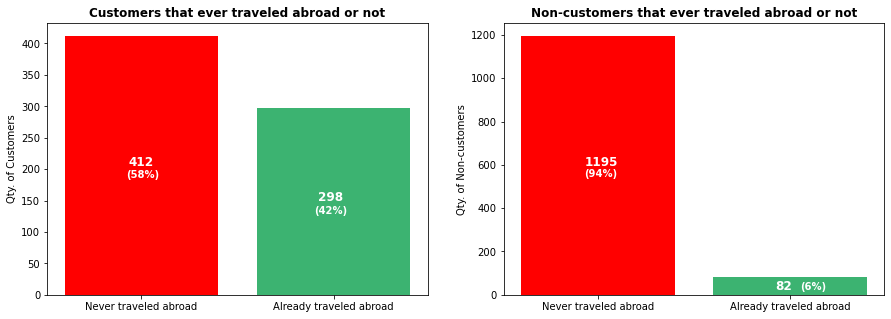

In [29]:
# Difference between customers and non-customers if they Ever Travelled Abroad or Not

f, axis = plt.subplots(1,2, figsize=(15,5))

# Plotting a customers if they Ever Travelled Abroad or Not barplot
plt.subplot(1,2,1)
plt.bar('Never traveled abroad',
        df[df['TravelInsurance'] == 1].EverTravelledAbroad.value_counts().values[0], 
        align='center', color='red')
plt.bar('Already traveled abroad',
        df[df['TravelInsurance'] == 1].EverTravelledAbroad.value_counts().values[1], 
        align='center', color='mediumseagreen')

# Setting titles and labels
plt.title("Customers that ever traveled abroad or not", fontweight='bold')
plt.ylabel('Qty. of Customers')

# Value customer never traveled abroad 
plt.text(x=-0.07,
         y=df[df['TravelInsurance'] == 1].EverTravelledAbroad.value_counts().values[0]/2,
         s=df[df['TravelInsurance'] == 1].EverTravelledAbroad.value_counts().values[0], 
         fontsize='large', fontweight='bold', color='w')
# Percentage customer never traveled abroad 
plt.text(x=-0.08,
         y=(df[df['TravelInsurance'] == 1].EverTravelledAbroad.value_counts().values[0]/2)-20,
         s="(" + str(round((df[df['TravelInsurance'] == 1].EverTravelledAbroad.value_counts().values[0]/df.TravelInsurance.value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# Value customer already ever traveled abroad 
plt.text(x=.92,
         y=df[df['TravelInsurance'] == 1].EverTravelledAbroad.value_counts().values[1]/2,
         s=df[df['TravelInsurance'] == 1].EverTravelledAbroad.value_counts().values[1],
         fontsize='large', fontweight='bold', color='w')
# Percentage customer already ever traveled abroad 
plt.text(x=0.9,
         y=(df[df['TravelInsurance'] == 1].EverTravelledAbroad.value_counts().values[1]/2)-20,
         s="(" + str(round((df[df['TravelInsurance'] == 1].EverTravelledAbroad.value_counts().values[1]/df.TravelInsurance.value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# Plotting a non-customers if they Ever Travelled Abroad or not barplot
plt.subplot(1,2,2)
plt.bar('Never traveled abroad',
        df[df['TravelInsurance'] == 0].EverTravelledAbroad.value_counts().values[0], 
        align='center', color='red')
plt.bar('Already traveled abroad',
        df[df['TravelInsurance'] == 0].EverTravelledAbroad.value_counts().values[1], 
        align='center', color='mediumseagreen')

# Setting titles and labels
plt.title("Non-customers that ever traveled abroad or not", fontweight='bold')
plt.ylabel('Qty. of Non-customers')

# Value non-customer never traveled abroad 
plt.text(x=-0.07,
         y=df[df['TravelInsurance'] == 0].EverTravelledAbroad.value_counts().values[0]/2,
         s=df[df['TravelInsurance'] == 0].EverTravelledAbroad.value_counts().values[0], 
         fontsize='large', fontweight='bold', color='w')
# Percentage non-customer never traveled abroad 
plt.text(x=-0.07,
         y=(df[df['TravelInsurance'] == 0].EverTravelledAbroad.value_counts().values[0]/2)-55,
         s="(" + str(round((df[df['TravelInsurance'] == 0].EverTravelledAbroad.value_counts().values[0]/df.TravelInsurance.value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# Value non-customer already ever traveled abroad 
plt.text(x=.92,
         y=(df[df['TravelInsurance'] == 0].EverTravelledAbroad.value_counts().values[1]/2)-20,
         s=df[df['TravelInsurance'] == 0].EverTravelledAbroad.value_counts().values[1],
         fontsize='large', fontweight='bold', color='w')
# Percentage non-customer already ever traveled abroad 
plt.text(x=1.05,
         y=(df[df['TravelInsurance'] == 0].EverTravelledAbroad.value_counts().values[1]/2)-20,
         s="(" + str(round((df[df['TravelInsurance'] == 0].EverTravelledAbroad.value_counts().values[1]/df.TravelInsurance.value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')
    
# showing plot
plt.show()

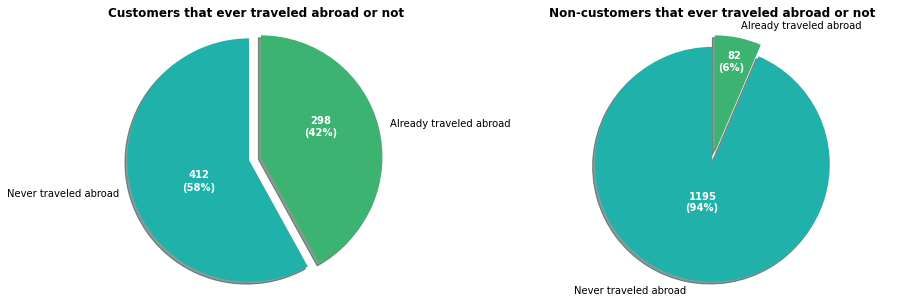

In [30]:
# Pie chart for travelers that ever traveled abroad or not

f, axis = plt.subplots(1,2, figsize=(15,5))

# Plotting a customers if they Ever Travelled Abroad or Not barplot
plt.subplot(1,2,1)

# Defining values and categories from categorical data
sizes = df[df['TravelInsurance'] == 1].EverTravelledAbroad.value_counts().values
labels = ['Never traveled abroad','Already traveled abroad']

# Setting explode feature in pie-chart
explode=(0,0.1)

# Plotting pie-chart
plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90, colors=['lightseagreen', 'mediumseagreen'])

# Values inside the bars
plt.text(x=-0.5,
         y=-0.15,
         s=df[df['TravelInsurance'] == 1].EverTravelledAbroad.value_counts().values[0], 
         color='w', 
         fontweight='bold')
plt.text(x=0.5,
         y=0.3,
         s=df[df['TravelInsurance'] == 1].EverTravelledAbroad.value_counts().values[1], 
         color='w', 
         fontweight='bold')

# Percentages
plt.text(x=-0.55,
         y=-0.25,
         s="(" + str(round((df[df['TravelInsurance'] == 1].EverTravelledAbroad.value_counts().values[0]/df['TravelInsurance'].value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')
plt.text(x=0.45,
         y=0.2,
         s="(" + str(round((df[df['TravelInsurance'] == 1].EverTravelledAbroad.value_counts().values[1]/df['TravelInsurance'].value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Customers that ever traveled abroad or not", fontweight='bold')
plt.axis('equal')  

#---------------------------------------------------------------------------

# Plotting a non-customers if they Ever Travelled Abroad or Not barplot
plt.subplot(1,2,2)

# Defining values and categories from categorical data
sizes = df[df['TravelInsurance'] == 0].EverTravelledAbroad.value_counts().values
labels = ['Never traveled abroad','Already traveled abroad']

# Setting explode feature in pie-chart
explode=(0,0.1)

# Plotting pie-chart
plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90, colors=['lightseagreen', 'mediumseagreen'])

# Values inside the bars
plt.text(x=-0.2,
         y=-0.3,
         s=df[df['TravelInsurance'] == 0].EverTravelledAbroad.value_counts().values[0], 
         color='w', 
         fontweight='bold')
plt.text(x=0.13,
         y=0.9,
         s=df[df['TravelInsurance'] == 0].EverTravelledAbroad.value_counts().values[1], 
         color='w', 
         fontweight='bold')

# Percentages
plt.text(x=-0.23,
         y=-0.4,
         s="(" + str(round((df[df['TravelInsurance'] == 0].EverTravelledAbroad.value_counts().values[0]/df['TravelInsurance'].value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')
plt.text(x=0.05,
         y=0.8,
         s="(" + str(round((df[df['TravelInsurance'] == 0].EverTravelledAbroad.value_counts().values[1]/df['TravelInsurance'].value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', 
         fontweight='bold', 
         color='w')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Non-customers that ever traveled abroad or not", fontweight='bold')
plt.axis('equal')

# Showing plot
plt.show()

In [31]:
df.EverTravelledAbroad.value_counts()

No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64

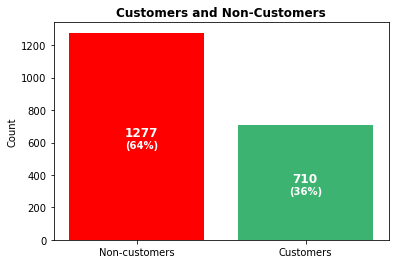

In [32]:
# Difference between customers and non-customers in a bar plot

# Plotting non-customers
plt.bar('Non-customers',
        df.TravelInsurance.value_counts().values[0], 
        align='center', color='red')
# Plotting customers
plt.bar('Customers',
        df.TravelInsurance.value_counts().values[1], 
        align='center', color='mediumseagreen')

# Setting titles and labels
plt.title("Customers and Non-Customers", fontweight='bold')
plt.ylabel('Count')

# Number of customers
plt.text(x=-0.07,
         y=df.TravelInsurance.value_counts().values[0]/2,
         s=df.TravelInsurance.value_counts().values[0], 
         fontsize='large', fontweight='bold', color='w')
# Percentage of customers
plt.text(x=-0.07,
         y=(df.TravelInsurance.value_counts().values[0]/2)-75,
         s="(" + str(round((df['TravelInsurance'].value_counts().values[0]/df.shape[0])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# Number of non-customers
plt.text(x=.92,
         y=df.TravelInsurance.value_counts().values[1]/2,
         s=df.TravelInsurance.value_counts().values[1],
         fontsize='large', fontweight='bold', color='w')
# Percentage of non-customers
plt.text(x=0.90,
         y=(df.TravelInsurance.value_counts().values[1]/2)-75,
         s="(" + str(round((df['TravelInsurance'].value_counts().values[1]/df.shape[0])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# showing plot
plt.show()

In [33]:
df['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

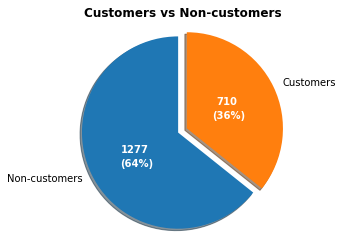

In [34]:
# Pie chart customers vs non-customers

# Defining values and categories from categorical data
sizes = df.TravelInsurance.value_counts().values
labels = ['Non-customers','Customers']

# Setting explode feature in pie-chart
explode=(0,0.1)

# Plotting pie-chart
plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90)

# Values inside the bars
plt.text(x=-0.6,y=-0.2,s=df.TravelInsurance.value_counts().values[0], color='w', fontweight='bold')
plt.text(x=0.4,y=0.3,s=df.TravelInsurance.value_counts().values[1], color='w', fontweight='bold')

# Percentages
plt.text(x=-0.6,
         y=-0.35,
         s="(" + str(round((df['TravelInsurance'].value_counts().values[0]/df.shape[0])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')
plt.text(x=0.35,
         y=0.15,
         s="(" + str(round((df['TravelInsurance'].value_counts().values[1]/df.shape[0])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')


# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Customers vs Non-customers", fontweight='bold')
plt.axis('equal')  

# Showing plot
plt.show()

In [35]:
df_travelinsurance = pd.DataFrame(index=['Customer','Non-customer'], data={'':[round((df.TravelInsurance.value_counts().values[1]/df.TravelInsurance.value_counts().values.sum())*100),
                                                 round((df.TravelInsurance.value_counts().values[0]/df.TravelInsurance.value_counts().values.sum())*100)]})
df_travelinsurance

,
Customer,36
Non-customer,64


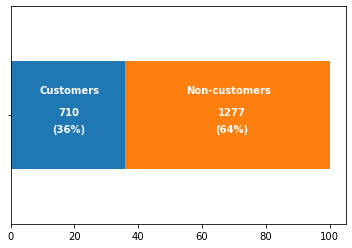

In [36]:
# Stacked bar for quantities and percentages of Customers and Non-customers

df_travelinsurance.T.plot.barh(stacked=True, legend=False)

# Values inside the bars
plt.text(x=65,
         y=0,
         s=df.TravelInsurance.value_counts().values[0], 
         color='w', 
         fontweight='bold')
plt.text(x=15,
         y=0,
         s=df.TravelInsurance.value_counts().values[1], 
         color='w', 
         fontweight='bold')

# Percentages
plt.text(x=64,
         y=-0.08,
         s="(" + str(round((df['TravelInsurance'].value_counts().values[0]/df.shape[0])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')
plt.text(x=13,
         y=-0.08,
         s="(" + str(round((df['TravelInsurance'].value_counts().values[1]/df.shape[0])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# Legends inside the bars
plt.text(x=9,
         y=0.1,
         s='Customers', 
         color='w', 
         fontweight='bold')
plt.text(x=55,
         y=0.1,
         s='Non-customers', 
         color='w', 
         fontweight='bold')

# Showing plot
plt.show()

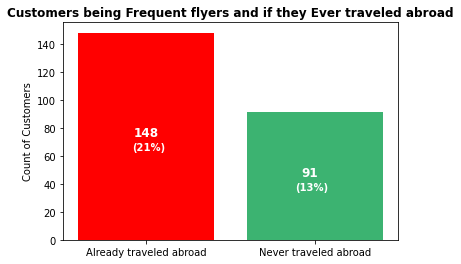

In [37]:
# Customers being Frequent flyers and if they Ever travelled abroad

# Plotting frequent flyer customers that already have ever traveled abroad
plt.bar('Already traveled abroad',
        df[(df['TravelInsurance'] == 1) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[0], 
        align='center', color='red')
plt.bar('Never traveled abroad',
        df[(df['TravelInsurance'] == 1) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[1], 
        align='center', color='mediumseagreen')

# Setting titles and labels
plt.title("Customers being Frequent flyers and if they Ever traveled abroad", fontweight='bold')
plt.ylabel('Count of Customers')
# Value
plt.text(x=-0.07,
         y=df[(df['TravelInsurance'] == 1) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[0]/2,
         s=df[(df['TravelInsurance'] == 1) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[0], 
         fontsize='large', fontweight='bold', color='w')
# Percentage
plt.text(x=-0.08,
         y=(df[(df['TravelInsurance'] == 1) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[0]/2)-10,
         s="(" + str(round((df[(df['TravelInsurance'] == 1) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[0]/df.TravelInsurance.value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# Value
plt.text(x=0.92,
         y=df[(df['TravelInsurance'] == 1) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[1]/2,
         s=df[(df['TravelInsurance'] == 1) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[1],
         fontsize='large', fontweight='bold', color='w')
# Percentage
plt.text(x=0.88,
         y=(df[(df['TravelInsurance'] == 1) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[1]/2)-10,
         s="(" + str(round((df[(df['TravelInsurance'] == 1) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[1]/df.TravelInsurance.value_counts().values[1])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# showing plot
plt.show()

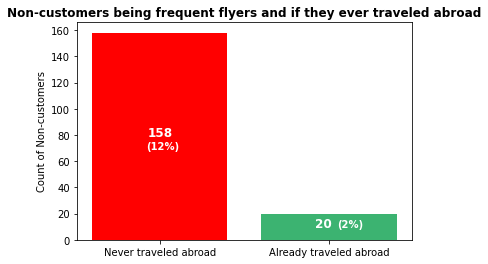

In [38]:
# Non-customers being Frequent flyers and if they Ever travelled abroad

# Plotting non-customers that already ever traveled abroad
plt.bar('Never traveled abroad',
        df[(df['TravelInsurance'] == 0) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[0], 
        align='center', color='red')
# Plotting non-customers that never traveled abroad
plt.bar('Already traveled abroad',
        df[(df['TravelInsurance'] == 0) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[1], 
        align='center', color='mediumseagreen')

# Setting titles and labels
plt.title("Non-customers being frequent flyers and if they ever traveled abroad", fontweight='bold')
plt.ylabel('Count of Non-customers')

# Value
plt.text(x=-0.07,
         y=df[(df['TravelInsurance'] == 0) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[0]/2,
         s=df[(df['TravelInsurance'] == 0) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[0], 
         fontsize='large', fontweight='bold', color='w')
# Percentage
plt.text(x=-0.08,
         y=(df[(df['TravelInsurance'] == 0) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[0]/2)-10,
         s="(" + str(round((df[(df['TravelInsurance'] == 0) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[0]/df.TravelInsurance.value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# Value
plt.text(x=.92,
         y=df[(df['TravelInsurance'] == 0) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[1]/2,
         s=df[(df['TravelInsurance'] == 0) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[1],
         fontsize='large', fontweight='bold', color='w')
# Percentage
plt.text(x=1.05,
         y=(df[(df['TravelInsurance'] == 0) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[1]/2),
         s="(" + str(round((df[(df['TravelInsurance'] == 0) & (df['FrequentFlyer'] == 'Yes')].EverTravelledAbroad.value_counts().values[1]/df.TravelInsurance.value_counts().values[0])*100,0))[:-2] + "%)", 
         fontsize='medium', fontweight='bold', color='w')

# showing plot
plt.show()

### Differences between customers and non-customers

#### Remembering that there are just three travel habits defined between customers and non-customers, Frequent flyer, Ever traveled abroad, and Ever bought travel insurance. We find out that:

- Even though 36% of the travelers are customers, which means at least one time they have bought travel insurance, 34% of those customers are frequent flyers and 42% of the customers also have traveled abroad once time.

- Secondly 68% of travelers have never bought travel insurance, which means they are not customers, only 14% of those travelers are frequent flyers, and also just 6% of those travelers have ever traveled abroad.

## What is the typical profile of customers and non-customers?

**Typical profile of Customers:**

To be considered a customer, it is necessary that the traveler bought travel insurance once, from the dataset 710 travelers (36%) are customers

- The average age of customers is 30 years, not wide different from non-customers.But the mode age is 34 years old.
- 80% of customers work at Private sector/Self Employed and 20% work at Government sector.
- 86% of the customers are Graduated.
- The customers have an average Annual Income is 1.13 million dollars, with a similar IQR compared with the non-customers.
- The distribution of Family Members for customers is very similar to the non-customers, even the statistical parameters. The average of Family Members for customers is 5 (4.93), median is 5 and the mode is 4, with a standard deviation of 1.68.
- 71% of the customers have no chronic disease.
- 66% of the customers are not frequent flyer.
- 42% of the customers have ever traveled abroad.

**Typical profile of Non-customers:**

The non-customer is the traveler never have bought travel insurance, about 1277 travelers (64%) are considered as non-customers.

- The average age of non-customers is 30 years. But the mode age is 28 years old, younger than customers.
- 66% of non-customers work at Private sector/Self Employed and 34% work at Goverment sector.
- 85% of the non-customers are Graduated, a very similar percentage to the customers.
- The non-customers have an average Annual Income is 0.82 million dollars, 0.31 million dollars less than the customers.
- The average of Family Members for non-customers is 5 (4.66), median is 4 and the mode is 4, with a standard deviation of 1.56. Both customers and non-customers have similar IQR.
- 73% of the non-customers have no chronic disease.
- 86% of the non-customers are not frequent flyer.
- Only 6% of the non-customers have ever traveled abroad.

## Final insights

In  Summary, effectively there are many differences between customers and non-customers. Firstly, a customer is anyone who had bought travel insurance once in his life, the non-customer is someone who had not bought travel insurance at any time in his life.

Secondly, talking about travel habits, 36% of travelers are customers, meanwhile, 64% of travelers are non-customers. There are more non-customers, nevertheless, 34% of those customers are Frequent flyers versus 14% of the non-customers being Frequent flyers.

Even more, 42% of the customers have traveled abroad once time compared with just 6% of non-customers who have traveled abroad some time.

Among customers and non-customers there are not many differences between their profiles, except for their Employment Type, Annual Income, Frequent flyer, Travel Abroad, and, of course, if they have bought Travel Insurance, then the next are the main differences between the profiles:

- 80% of customers work at Private sector/Self Employed and 66% of non-customers work at same Employment Type
- The average of Annual Income  for customers is 1.13 million dlls meanwhile 0.82 million dlls is the average Annual Income for non-customers.
- 66% of the customers are not Frequent Flyers and 86% of non-customers are not Frequent Flyers
- 42% of the customers have ever Traveled Abroad, but only 6% of non-customers have ever Traveled Abroad.

For the rest of the features, Age, Graduated or Not, Family Members, and Chronic Diseases practically these features are very similar for both customers and non-customers.

### Inspecting Highest Annual Income profiles

In [39]:
 df.sort_values(by=['AnnualIncome','ChronicDiseases','FamilyMembers'], ascending=[False,False,False])[:10]

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
346,25,Private Sector/Self Employed,Yes,1800000,7,1,Yes,No,1
1123,25,Private Sector/Self Employed,Yes,1800000,6,1,Yes,No,1
1650,25,Private Sector/Self Employed,Yes,1800000,4,1,Yes,No,1
1823,25,Private Sector/Self Employed,Yes,1800000,6,0,Yes,No,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
988,31,Private Sector/Self Employed,Yes,1750000,7,0,No,No,0
654,32,Government Sector,Yes,1750000,6,0,No,No,0
953,29,Private Sector/Self Employed,Yes,1750000,6,0,No,No,0
1476,33,Private Sector/Self Employed,Yes,1750000,6,0,No,No,1
1534,33,Government Sector,Yes,1750000,6,0,No,No,1


60% of travelers with the highest Annual Incomes, have the next characteristics:

- an average age of 27 years old.
- an average of 6 family members.
- all of them being Graduated.
- 50% of them having a Chronic Disease.
- 66% of them being Frequent Flyer.
- 83% of them working in Private Sector/Self Employed.
- and never traveled abroad.

have already bought Travel Insurance once.

### Inspecting Lowest Annual Income profiles

In [40]:
df.sort_values(by=['AnnualIncome','ChronicDiseases', 'FamilyMembers'], ascending=[True,False, False])[:10]

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
36,31,Government Sector,No,300000,9,1,No,No,0
412,28,Government Sector,Yes,300000,7,1,No,No,0
1065,28,Government Sector,No,300000,7,1,No,No,0
1655,28,Government Sector,Yes,300000,7,1,No,No,0
1866,28,Government Sector,Yes,300000,7,1,No,No,0
961,28,Government Sector,No,300000,6,1,No,No,0
1119,28,Government Sector,Yes,300000,6,1,No,No,0
1293,28,Government Sector,Yes,300000,6,1,No,No,0
1374,28,Government Sector,Yes,300000,6,1,No,No,0
1809,28,Government Sector,Yes,300000,6,1,No,No,0


100% of travelers with the lowest Annual Income, have the next characteristics:

- an average age of 28 years old.
- an average of 7 family members.
- 70% of them already Graduated.
- all of them having a Chronic Disease.
- all of them being non-Frequent Flyer.
- all of them working in Goverment Sector.
- and never traveled abroad.

never have bought Travel Insurance once.

### Customers and Non-customers Age segmentation by Annual Income

In [41]:
# Defining customers annual income data
customers_income = list(df[df.TravelInsurance == 1].AnnualIncome)

# Freedman-Diaconis rule to find number of bins
q1_cust_income = np.quantile(customers_income, 0.25)
q3_cust_income = np.quantile(customers_income, 0.75)
iqr_cust_income = q3_cust_income - q1_cust_income
bin_width_cust_income = (2 * iqr_cust_income) / (len(customers_income) ** (1 / 3))
bin_count_cust_income = int(np.ceil(max(customers_income) - min(customers_income)) / bin_width_cust_income)


# Defining non-customers annual income data
non_customers_income = list(df[df.TravelInsurance == 0].AnnualIncome)

# Freedman-Diaconis rule to find number of bins
q1_non_cust_income = np.quantile(non_customers_income, 0.25)
q3_non_cust_income = np.quantile(non_customers_income, 0.75)
iqr_non_cust_income = q3_non_cust_income - q1_non_cust_income
bin_width_non_cust_income = (2 * iqr_non_cust_income) / (len(non_customers_income) ** (1 / 3))
bin_count_non_cust_income = int(np.ceil(max(non_customers_income) - min(non_customers_income)) / bin_width_non_cust_income)

In [42]:
bin_width_cust_income,bin_count_cust_income

(134512.23737416766, 11)

In [43]:
# Lists of Ages by Annual Income segmentation

# 12 Customer ages by annual income bins creation
customer_age_income_bin1 = list(df[(df['TravelInsurance'] == 1) 
& (df['AnnualIncome'] < (df['AnnualIncome'].min() + bin_width_cust_income))].Age)

for i in range(1,bin_count_cust_income+5):
    globals()['customer_age_income_bin' + str(i+1)] = list(df[(df['TravelInsurance'] == 1) 
& (df['AnnualIncome'] > (df['AnnualIncome'].min() + bin_width_cust_income*(i))) 
& (df['AnnualIncome'] < (df['AnnualIncome'].min() + bin_width_cust_income*(i+1)))].Age)

# 15 Non-customer ages by annual income bins creation
non_customer_age_income_bin1 = list(df[(df['TravelInsurance'] == 0) 
& (df['AnnualIncome'] < (df['AnnualIncome'].min() + bin_width_non_cust_income))].Age)   

for i in range(1,bin_count_non_cust_income+2):
    globals()['non_customer_age_income_bin' + str(i+1)] = list(df[(df['TravelInsurance'] == 0) 
& (df['AnnualIncome'] > (df['AnnualIncome'].min() + bin_width_non_cust_income*(i))) 
& (df['AnnualIncome'] < (df['AnnualIncome'].min() + bin_width_non_cust_income*(i+1)))].Age)


In [44]:
# Function to calculate median, mean, mode and std dev for customers age by annual income segmentation
def func_cust(x):
    age_medians_customer.append(np.quantile(x,0.5))
    age_means_customer.append(np.mean(x))
    age_modes_customer.append(st.mode(x))
    age_stds_customer.append(np.std(x))

# Lists to store medians, means, modes and std devs for customers age, the length of lists will be the number of
# segmentations 
age_medians_customer = []
age_means_customer = []
age_modes_customer = []
age_stds_customer = []

# Applying function to each customer age lists by annual income
for i in range(1,bin_count_cust_income+2):
    func_cust(globals()['customer_age_income_bin' + str(i)])

# Bins of Annual incomes for customers

customer_incomes = [bin_width_cust_income*i for i in range(1,bin_count_cust_income+2)]

In [45]:
# Function to calculate median, mean, mode and std dev for customers age by annual income segmentation
def non_func_cust(x):
    if len(x) > 0:
        age_medians_non_customer.append(np.quantile(x,0.5))
        age_means_non_customer.append(np.mean(x))
        age_modes_non_customer.append(st.mode(x))
        age_stds_non_customer.append(np.std(x))
    else:
        age_medians_non_customer.append(round(np.quantile(age_medians_non_customer,0.5),1))
        age_means_non_customer.append(round(np.quantile(age_means_non_customer,0.5),1))
        age_modes_non_customer.append(round(np.quantile(age_modes_non_customer,0.5),1))
        age_stds_non_customer.append(round(np.quantile(age_stds_non_customer,0.5),1))

# Lists to store medians, means, modes and std devs for non-customers age, the length of lists 
# will be the number of segmentations 
age_medians_non_customer = []
age_means_non_customer = []
age_modes_non_customer = []
age_stds_non_customer = []    

# Applying function to each non-customer age lists by annual income
for i in range(1,bin_count_non_cust_income+2):
    non_func_cust(globals()['non_customer_age_income_bin' + str(i)])

# Bins of Annual incomes for non-customers
non_customer_incomes = [bin_width_non_cust_income*i for i in range(2,bin_count_non_cust_income+3)]

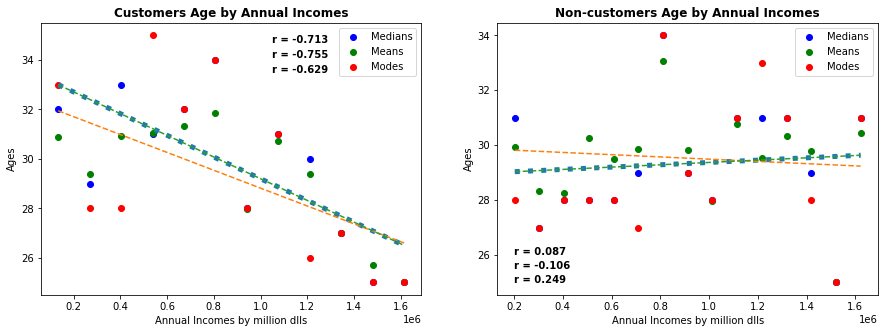

In [46]:
# Plots of statistical parameters of customer and non-customer ages by annual income

f, axis = plt.subplots(1,2, figsize=(15,5))

# Plotting a customer's statistical parameters
plt.subplot(1,2,1)

# Customer medians
plt.scatter(customer_incomes, age_medians_customer, color='blue', label='Medians')
z_medians_cust = np.polyfit(customer_incomes, age_medians_customer, 1)
p_medians_cust = np.poly1d(z_medians_cust)
plt.plot(customer_incomes, p_medians_cust(customer_incomes), linestyle=':', lw=5)
# Correlation coeff
plt.text(x=1.05e6,
         y=34.7,
         s="r = " + str(round(np.corrcoef(customer_incomes, age_medians_customer)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Customer means
plt.scatter(customer_incomes, age_means_customer, color='green', label='Means')
z_means_cust = np.polyfit(customer_incomes, age_means_customer, 1)
p_means_cust = np.poly1d(z_means_cust)
plt.plot(customer_incomes, p_means_cust(customer_incomes), linestyle='--')
# Correlation coeff
plt.text(x=1.05e6,
         y=34.1,
         s="r = " + str(round(np.corrcoef(customer_incomes, age_means_customer)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Customer modes
plt.scatter(customer_incomes, age_modes_customer, color='red', label='Modes')
z_modes_cust = np.polyfit(customer_incomes, age_modes_customer, 1)
p_modes_cust = np.poly1d(z_medians_cust)
plt.plot(customer_incomes, p_modes_cust(customer_incomes), linestyle='--')
# Correlation coeff
plt.text(x=1.05e6,
         y=33.5,
         s="r = " + str(round(np.corrcoef(customer_incomes, age_modes_customer)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Setting titles and labels
plt.title('Customers Age by Annual Incomes', fontweight='bold')
plt.ylabel("Ages")
plt.xlabel("Annual Incomes by million dlls")
plt.legend()

# Plotting a non-customer's statistical parameters
plt.subplot(1,2,2)

# Non-customer medians
plt.scatter(non_customer_incomes, age_medians_non_customer, color='blue', label='Medians')
z_medians_non_customers = np.polyfit(non_customer_incomes, age_medians_non_customer, 1)
p_medians_non_customers = np.poly1d(z_medians_non_customers)
plt.plot(non_customer_incomes, p_medians_non_customers(non_customer_incomes), linestyle=':', lw=5)
# Correlation coeff
plt.text(x=0.2e6,
         y=26,
         s="r = " + str(round(np.corrcoef(non_customer_incomes, age_medians_non_customer)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Non-customer means
plt.scatter(non_customer_incomes, age_means_non_customer, color='green', label='Means')
z_means_non_customers = np.polyfit(non_customer_incomes, age_means_non_customer, 1)
p_means_non_customers = np.poly1d(z_means_non_customers)
plt.plot(non_customer_incomes, p_means_non_customers(non_customer_incomes), linestyle='--')
# Correlation coeff
plt.text(x=0.2e6,
         y=25.5,
         s="r = " + str(round(np.corrcoef(non_customer_incomes, age_means_non_customer)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Non-customer modes
plt.scatter(non_customer_incomes, age_modes_non_customer, color='red', label='Modes')
z_modes_non_customers = np.polyfit(non_customer_incomes, age_modes_non_customer, 1)
p_modes_non_customers = np.poly1d(z_medians_non_customers)
plt.plot(non_customer_incomes, p_modes_non_customers(non_customer_incomes), linestyle='--')
# Correlation coeff
plt.text(x=0.2e6,
         y=25,
         s="r = " + str(round(np.corrcoef(non_customer_incomes, age_modes_non_customer)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Setting titles and labels
plt.title('Non-customers Age by Annual Incomes', fontweight='bold')
plt.ylabel("Ages")
plt.xlabel("Annual Incomes by million dlls")
plt.legend()

# Showing plot
plt.show()

As we see, there is a negative relative strong correlation between annual income and the age of customers. Meanwhile, we observe **no relationship** between annual income and the age of non-customers.

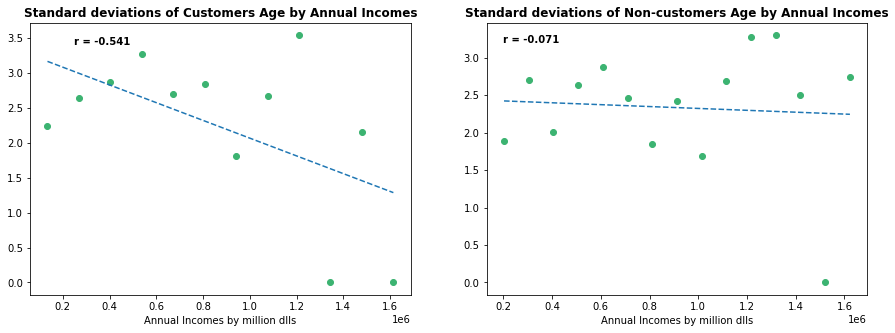

In [47]:
# Plotting Standard deviations of customer and non-customer age along annual incomes bins

f, axis = plt.subplots(1,2, figsize=(15,5))

# Subplotting a customer's statistical parameters
plt.subplot(1,2,1)

# Customers Std devs scatterplot
plt.scatter(customer_incomes, age_stds_customer, color='mediumseagreen')

# Plotting trendline
z_stds_cust = np.polyfit(customer_incomes, age_stds_customer, 1)
p_stds_cust = np.poly1d(z_stds_cust)
plt.plot(customer_incomes, p_stds_cust(customer_incomes), linestyle='--')
# Correlation coeff
plt.text(x=0.25e6,
         y=3.4,
         s="r = " + str(round(np.corrcoef(customer_incomes, age_stds_customer)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Setting title and labels
plt.title('Standard deviations of Customers Age by Annual Incomes', fontweight='bold')
plt.xlabel("Annual Incomes by million dlls")


plt.subplot(1,2,2)

# Non-customers Std devs scatterplor
plt.scatter(non_customer_incomes, age_stds_non_customer, color='mediumseagreen')

# Plotting trendline
z_stds_non_customer = np.polyfit(non_customer_incomes, age_stds_non_customer, 1)
p_stds_non_customer = np.poly1d(z_stds_non_customer)
plt.plot(non_customer_incomes, p_stds_non_customer(non_customer_incomes), linestyle='--')
# Correlation coeff
plt.text(x=0.2e6,
         y=3.2,
         s="r = " + str(round(np.corrcoef(non_customer_incomes, age_stds_non_customer)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Setting title and labels
plt.title('Standard deviations of Non-customers Age by Annual Incomes', fontweight='bold')
plt.xlabel("Annual Incomes by million dlls")

# Showing both plots
plt.show()

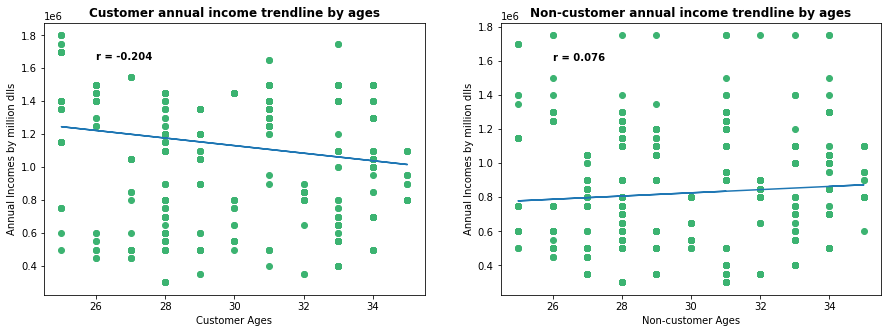

In [48]:
# Customer and non-customer annual incomes trendline by ages

f, axis = plt.subplots(1,2, figsize=(15,5))

# Subplotting a customer's ages trendline by annual income
plt.subplot(1,2,1)

# Customer's annual incomes
x_cust = list(df[df['TravelInsurance'] == 1].Age.values)

# Customer's ages
y_cust = list(df[df['TravelInsurance'] == 1].AnnualIncome.values)

# Plotting scatter for customer's ages by annual incomes
plt.scatter(x_cust, y_cust, color='mediumseagreen')

# Customer's annual incomes trendline
z_cust = np.polyfit(x_cust, y_cust, 1)
p_cust = np.poly1d(z_cust)
plt.plot(x_cust, p_cust(x_cust))
# Correlation coeff
plt.text(x=26,
         y=1.65e6,
         s="r = " + str(round(np.corrcoef(x_cust, y_cust)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Setting title and labels
plt.title('Customer annual income trendline by ages', fontweight='bold')
plt.ylabel("Annual Incomes by million dlls")
plt.xlabel("Customer Ages")


# Subplotting a non-customer's ages trendline by annual income
plt.subplot(1,2,2)

# Non-customer's annual incomes
x_non_cust = list(df[df['TravelInsurance'] == 0].Age.values)

# Non-customer's ages
y_non_cust = list(df[df['TravelInsurance'] == 0].AnnualIncome.values)

# Plotting scatter for non-customer's ages by annual incomes
plt.scatter(x_non_cust, y_non_cust, color='mediumseagreen')

# Non-customer's annual incomes trendline
z_non_cust = np.polyfit(x_non_cust, y_non_cust, 1)
p_non_cust = np.poly1d(z_non_cust)
plt.plot(x_non_cust, p_non_cust(x_non_cust))
# Correlation coeff
plt.text(x=26,
         y=1.6e6,
         s="r = " + str(round(np.corrcoef(x_non_cust, y_non_cust)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Setting title and labels
plt.title('Non-customer annual income trendline by ages', fontweight='bold')
plt.ylabel("Annual Incomes by million dlls")
plt.xlabel("Non-customer Ages")

# Showing plots
plt.show()

### Ages vs Frequent Flyer count 

In [49]:
# Defining customers age data
customers_age = list(df[df.TravelInsurance == 1].Age)

# Freedman-Diaconis rule to find number of bins
q1_cust_age = np.quantile(customers_age, 0.25)
q3_cust_age = np.quantile(customers_age, 0.75)
iqr_cust_age = q3_cust_age - q1_cust_age
bin_width_cust_age = (2 * iqr_cust_age) / (len(customers_age) ** (1 / 3))
bin_count_cust_age = int(np.ceil(max(customers_age) - min(customers_age)) / bin_width_cust_age)


# Defining non-customers annual income data
non_customers_age = list(df[df.TravelInsurance == 0].Age)

# Freedman-Diaconis rule to find number of bins
q1_non_cust_age = np.quantile(non_customers_age, 0.25)
q3_non_cust_age = np.quantile(non_customers_age, 0.75)
iqr_non_cust_age = q3_non_cust_age - q1_non_cust_age
bin_width_non_cust_age = (2 * iqr_non_cust_age) / (len(non_customers_age) ** (1 / 3))
bin_count_non_cust_age = int(np.ceil(max(non_customers_age) - min(non_customers_age)) / bin_width_non_cust_age)

In [50]:
# Lists of Ages segmentation 

# 8 Customer ages by frequent flyer bins
customer_age_freq_and_non_freq_bin1 = list(df[(df['TravelInsurance'] == 1) & (df['Age'] < (df['Age'].min() + bin_width_cust_age))].FrequentFlyer)
for i in range(1,bin_count_cust_age+1):
    globals()['customer_age_freq_and_non_freq_bin' + str(i+1)] = list(df[(df['TravelInsurance'] == 1) & (df['Age'] > (df['Age'].min() + i*bin_width_cust_age)) & (df['Age'] < (df['Age'].min() + (i+1)*bin_width_cust_age))].FrequentFlyer)

# 19 Non-customer ages by frequent flyer bins
non_customer_age_freq_and_non_freq_bin1 = list(df[(df['TravelInsurance'] == 0) & (df['Age'] < (df['Age'].min() + bin_width_non_cust_age))].FrequentFlyer)
for i in range(1,bin_count_non_cust_age+1):
    globals()['non_customer_age_freq_and_non_freq_bin' + str(i+1)] = list(df[(df['TravelInsurance'] == 0) & (df['Age'] > (df['Age'].min() + i*bin_width_non_cust_age)) & (df['Age'] < (df['Age'].min() + (i+1)*bin_width_non_cust_age))].FrequentFlyer)

In [51]:
# Number of Customer Frequent Flyers by Age bin

for i in range(1,bin_count_cust_age+1):
    globals()['cust_freq_fly' + str(i)] = len([1 for i in globals()['customer_age_freq_and_non_freq_bin' + str(i)] if i == 'Yes'])

customer_frequent_flyers = []
for i in range(1,bin_count_cust_age+1):
    customer_frequent_flyers.append(globals()['cust_freq_fly' + str(i)])


# Number of Customer Non-Frequent Flyers by Age bin

for i in range(1,bin_count_cust_age+1):
    globals()['cust_non_freq_fly' + str(i)] = len([1 for i in globals()['customer_age_freq_and_non_freq_bin' + str(i)] if i == 'No'])

customer_non_frequent_flyers = []
for i in range(1,bin_count_cust_age+1):
    customer_non_frequent_flyers.append(globals()['cust_non_freq_fly' + str(i)])


# 7 Bins of Ages for customers
customer_ages = []
for i in range(1,bin_count_cust_age+1):
    customer_ages.append(df.Age.min() + bin_width_cust_age*i)

#---------------------------------------------------------------------

# Number of Non-customer Frequent Flyers by Age bin

for i in range(1,bin_count_non_cust_age+1):
    globals()['non_cust_freq_fly' + str(i)] = len([1 for i in globals()['non_customer_age_freq_and_non_freq_bin' + str(i)] if i == 'Yes'])
    
non_customer_frequent_flyers = []
for i in range(1,bin_count_non_cust_age+1):
    non_customer_frequent_flyers.append(globals()['non_cust_freq_fly' + str(i)])    


# Number of Non-customer Non-Frequent Flyers by Age bin

for i in range(1,bin_count_non_cust_age+1):
    globals()['non_cust_non_freq_fly' + str(i)] = len([1 for i in globals()['non_customer_age_freq_and_non_freq_bin' + str(i)] if i == 'No'])
non_customer_non_frequent_flyers = []
for i in range(1,bin_count_non_cust_age+1):
    non_customer_non_frequent_flyers.append(globals()['non_cust_non_freq_fly' + str(i)])
    
# 18 Bins of Ages for customers
non_customer_ages = []
for i in range(1,bin_count_non_cust_age+1):
    non_customer_ages.append(df.Age.min() + bin_width_non_cust_age*i)
    

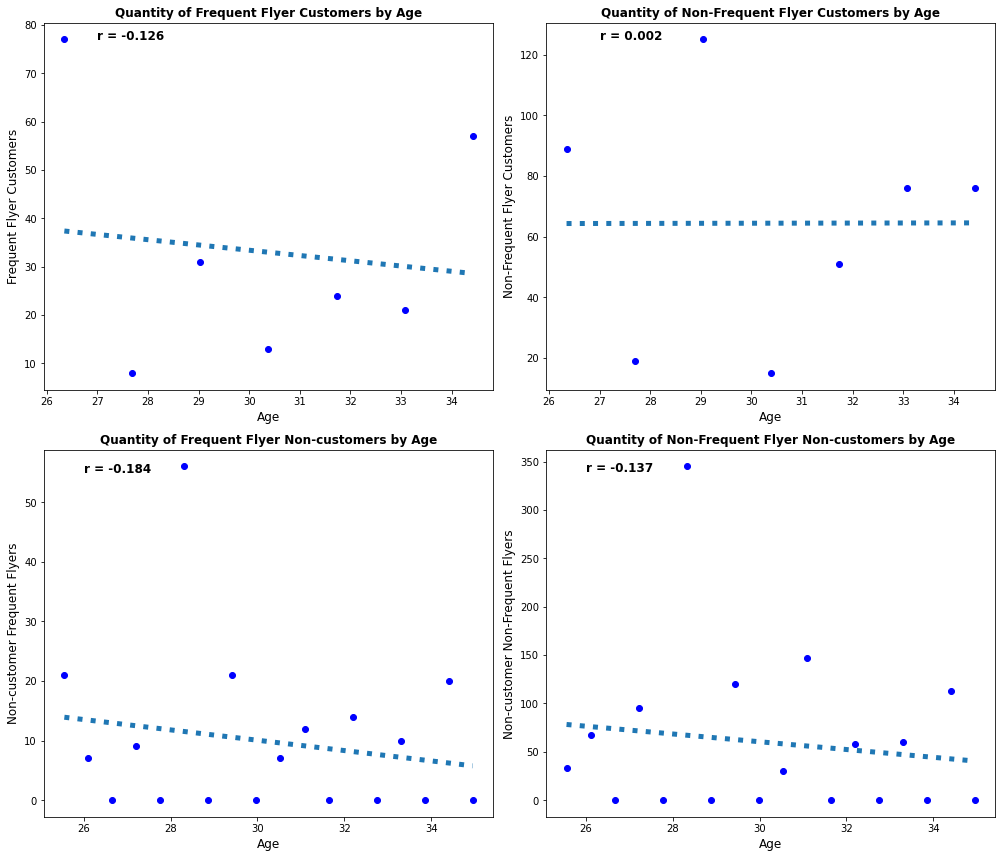

In [52]:
# Plotting four scatters of Age vs Qty of Frequent Flyer
f, axs = plt.subplots(2,2, figsize=(14,12))

# Subplotting Customer Frequent Flyers by Age 

# Qty of Frequent Flyer Customers by Age bins
axs[0,0].scatter(customer_ages, customer_frequent_flyers, color='blue')
z_cust_freq_fly = np.polyfit(customer_ages, customer_frequent_flyers, 1)
p_cust_freq_fly = np.poly1d(z_cust_freq_fly)
axs[0,0].plot(customer_ages, p_cust_freq_fly(customer_ages), linestyle=':', lw=5)
# Correlation coeff
axs[0,0].text(x=27, y=77,s="r = " + str(round(np.corrcoef(customer_ages, customer_frequent_flyers)[0][1],3)), 
         fontsize='large', fontweight='bold')

# Setting titles and labels
axs[0,0].set_title('Quantity of Frequent Flyer Customers by Age', fontweight='bold', fontsize='large')
axs[0,0].set_ylabel("Frequent Flyer Customers", fontsize='large')
axs[0,0].set_xlabel("Age", fontsize='large')


# Subplotting Customer Non-Frequent Flyers by Age 

# Qty of Non-Frequent Flyer Customers by Age bins
axs[0,1].scatter(customer_ages, customer_non_frequent_flyers, color='blue')
z_cust_non_freq_fly = np.polyfit(customer_ages, customer_non_frequent_flyers, 1)
p_cust_non_freq_fly = np.poly1d(z_cust_non_freq_fly)
axs[0,1].plot(customer_ages, p_cust_non_freq_fly(customer_ages), linestyle=':', lw=5)
# Correlation coeff
axs[0,1].text(x=27, y=125,s="r = " + str(round(np.corrcoef(customer_ages, customer_non_frequent_flyers)[0][1],3)), 
         fontsize='large', fontweight='bold')

# Setting titles and labels
axs[0,1].set_title('Quantity of Non-Frequent Flyer Customers by Age', fontweight='bold', fontsize='large')
axs[0,1].set_ylabel("Non-Frequent Flyer Customers", fontsize='large')
axs[0,1].set_xlabel("Age", fontsize='large')

#-----------------------------------------------------------------------------


# Subplotting Non-customers Frequent Flyer by Age 

# Qty of Frequent Flyer Non-customers by Age bins
axs[1,0].scatter(non_customer_ages, non_customer_frequent_flyers, color='blue')
z_non_cust_freq_fly = np.polyfit(non_customer_ages, non_customer_frequent_flyers, 1)
p_non_cust_freq_fly = np.poly1d(z_non_cust_freq_fly)
axs[1,0].plot(non_customer_ages, p_non_cust_freq_fly(non_customer_ages), linestyle=':', lw=5)
# Correlation coeff
axs[1,0].text(x=26, y=55,s="r = " + str(round(np.corrcoef(non_customer_ages, non_customer_frequent_flyers)[0][1],3)), 
         fontsize='large', fontweight='bold')

# Setting titles and labels
axs[1,0].set_title('Quantity of Frequent Flyer Non-customers by Age', fontweight='bold', fontsize='large')
axs[1,0].set_ylabel("Non-customer Frequent Flyers", fontsize='large')
axs[1,0].set_xlabel("Age", fontsize='large')



# Subplotting Non-Frequent Flyer Non-customers by Age 

# Qty of Non-customer Frequent Flyers by Age bins
axs[1,1].scatter(non_customer_ages, non_customer_non_frequent_flyers, color='blue')
z_non_cust_non_freq_fly = np.polyfit(non_customer_ages, non_customer_non_frequent_flyers, 1)
p_non_cust_non_freq_fly = np.poly1d(z_non_cust_non_freq_fly)
axs[1,1].plot(non_customer_ages, p_non_cust_non_freq_fly(non_customer_ages), linestyle=':', lw=5)
# Correlation coeff
axs[1,1].text(x=26, y=340,s="r = " + str(round(np.corrcoef(non_customer_ages, non_customer_non_frequent_flyers)[0][1],3)), 
         fontsize='large', fontweight='bold')

# Setting titles and labels
axs[1,1].set_title('Quantity of Non-Frequent Flyer Non-customers by Age', fontweight='bold', fontsize='large')
axs[1,1].set_ylabel("Non-customer Non-Frequent Flyers", fontsize='large')
axs[1,1].set_xlabel("Age", fontsize='large')

# Showing plot
f.tight_layout(pad=1.0)
plt.show()

### Age vs Travel abroad count

#### Defining customers age data from past excercise

We are going to use the same customers and non-customers age bins, Freedman-Diaconis rule to find number of bins, used in the past exercise


In [53]:
bin_width_cust_age, bin_width_non_cust_age

(1.3451223737416764, 0.5530371230357042)

In [54]:
bin_count_cust_age, bin_count_non_cust_age

(7, 18)

In [55]:
# Lists of Ages segmentation

# 8 Customer ages by traveled abroad bins
customer_age_abroad_and_no_abroad_bin1 = list(df[(df['TravelInsurance'] == 1) & (df['Age'] < (df['Age'].min() + bin_width_cust_age))].EverTravelledAbroad)
for i in range(1,bin_count_cust_age+2):
    globals()['customer_age_abroad_and_no_abroad_bin' + str(i+1)] = list(df[(df['TravelInsurance'] == 1) & (df['Age'] > (df['Age'].min() + i*bin_width_cust_age)) & (df['Age'] < (df['Age'].min() + (i+1)*bin_width_cust_age))].EverTravelledAbroad)

# 19 Non-customer ages by traveled abroad bins
non_customer_age_abroad_and_no_abroad_bin1 = list(df[(df['TravelInsurance'] == 0) & (df['Age'] < (df['Age'].min() + bin_width_non_cust_age))].EverTravelledAbroad)
for i in range(1,bin_count_non_cust_age+1):
    globals()['non_customer_age_abroad_and_no_abroad_bin' + str(i+1)] = list(df[(df['TravelInsurance'] == 0) & (df['Age'] > (df['Age'].min() + i*bin_width_non_cust_age)) & (df['Age'] < (df['Age'].min() + (i+1)*bin_width_non_cust_age))].EverTravelledAbroad)


In [56]:
# Number of Traveler Abroad Customers by Age bin

for i in range(1,bin_count_cust_age+1):
    globals()['cust_trav_abro' + str(i)] = len([1 for i in globals()['customer_age_abroad_and_no_abroad_bin' + str(i)] if i == 'Yes'])

customer_travel_abroad = []
for i in range(1,bin_count_cust_age+1):
    customer_travel_abroad.append(globals()['cust_trav_abro' + str(i)])


# Number of Traveler Abroad Non-Customers by Age bin

for i in range(1,bin_count_cust_age+1):
    globals()['cust_non_trav_abro' + str(i)] = len([1 for i in globals()['customer_age_abroad_and_no_abroad_bin' + str(i)] if i == 'No'])

customer_non_travel_abroad = []
for i in range(1,bin_count_cust_age+1):
    customer_non_travel_abroad.append(globals()['cust_non_trav_abro' + str(i)])


# 7 Bins of Ages for customers
customer_ages = []
for i in range(1,bin_count_cust_age+1):
    customer_ages.append(df.Age.min() + bin_width_cust_age*i)

#---------------------------------------------------------------------

# Number of Traveler Abroad Non-customers by Age bin

for i in range(1,bin_count_non_cust_age+1):
    globals()['non_cust_trav_abro' + str(i)] = len([1 for i in globals()['non_customer_age_abroad_and_no_abroad_bin' + str(i)] if i == 'Yes'])

non_customer_travel_abroad = []
for i in range(1,bin_count_non_cust_age+1):
    non_customer_travel_abroad.append(globals()['non_cust_trav_abro' + str(i)])    


# Number of Non-Traveler Abroad Non-customers by Age bin

for i in range(1,bin_count_non_cust_age+1):
    globals()['non_cust_non_trav_abro' + str(i)] = len([1 for i in globals()['non_customer_age_abroad_and_no_abroad_bin' + str(i)] if i == 'No'])
non_customer_non_travel_abroad = []
for i in range(1,bin_count_non_cust_age+1):
    non_customer_non_travel_abroad.append(globals()['non_cust_non_trav_abro' + str(i)])
    
# 18 Bins of Ages for customers
non_customer_ages = []
for i in range(1,bin_count_non_cust_age+1):
    non_customer_ages.append(df.Age.min() + bin_width_non_cust_age*i)


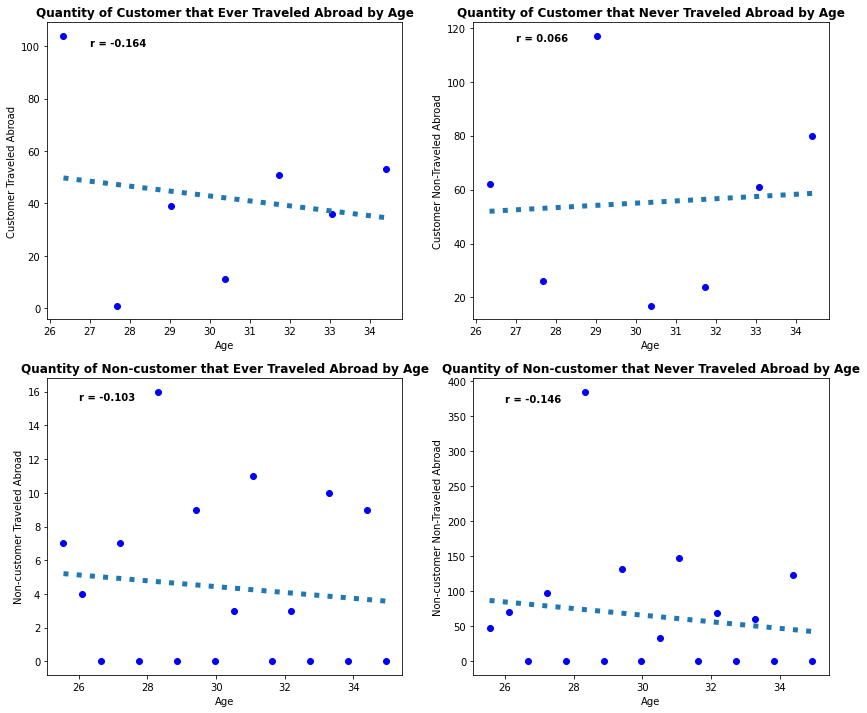

In [57]:
# Plotting four scatters of Age vs Qty of Traveled Abroad
f, axs = plt.subplots(2,2, figsize=(14,12))

# 1st. Plot Qty of Customer Traveled Abroad by Age bins
axs[0,0].scatter(customer_ages, customer_travel_abroad, color='blue')
z_cust_trav_abro = np.polyfit(customer_ages, customer_travel_abroad, 1)
p_cust_trav_abro = np.poly1d(z_cust_trav_abro)
axs[0,0].plot(customer_ages, p_cust_trav_abro(customer_ages), linestyle=':', lw=5)
# Correlation coeff
axs[0,0].text(x=27, y=100,s="r = " + str(round(np.corrcoef(customer_ages, customer_travel_abroad)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Setting titles and labels
axs[0,0].set_title('Quantity of Customer that Ever Traveled Abroad by Age', fontweight='bold')
axs[0,0].set_ylabel("Customer Traveled Abroad")
axs[0,0].set_xlabel("Age")


# 2nd. Plot Qty of Customer Non-Traveled Abroad by Age bins
axs[0,1].scatter(customer_ages, customer_non_travel_abroad, color='blue')
z_cust_non_trav_abro = np.polyfit(customer_ages, customer_non_travel_abroad, 1)
p_cust_non_trav_abro = np.poly1d(z_cust_non_trav_abro)
axs[0,1].plot(customer_ages, p_cust_non_trav_abro(customer_ages), linestyle=':', lw=5)
# Correlation coeff
axs[0,1].text(x=27, y=115,s="r = " + str(round(np.corrcoef(customer_ages, customer_non_travel_abroad)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Setting titles and labels
axs[0,1].set_title('Quantity of Customer that Never Traveled Abroad by Age', fontweight='bold')
axs[0,1].set_ylabel("Customer Non-Traveled Abroad")
axs[0,1].set_xlabel("Age")

#-----------------------------------------------------------------------------


# 3rd. Plot Qty of Non-customer Traveled Abroad by Age bins
axs[1,0].scatter(non_customer_ages, non_customer_travel_abroad, color='blue')
z_non_cust_trav_abro = np.polyfit(non_customer_ages, non_customer_travel_abroad, 1)
p_non_cust_trav_abro = np.poly1d(z_non_cust_trav_abro)
axs[1,0].plot(non_customer_ages, p_non_cust_trav_abro(non_customer_ages), linestyle=':', lw=5)
# Correlation coeff
axs[1,0].text(x=26, y=15.5,s="r = " + str(round(np.corrcoef(non_customer_ages, non_customer_travel_abroad)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Setting titles and labels
axs[1,0].set_title('Quantity of Non-customer that Ever Traveled Abroad by Age', fontweight='bold')
axs[1,0].set_ylabel("Non-customer Traveled Abroad")
axs[1,0].set_xlabel("Age")


# 4th. Plot Qty of Non-customer Traveled Abroad by Age bins
axs[1,1].scatter(non_customer_ages, non_customer_non_travel_abroad, color='blue')
z_non_cust_non_trav_abro = np.polyfit(non_customer_ages, non_customer_non_travel_abroad, 1)
p_non_cust_non_trav_abro = np.poly1d(z_non_cust_non_trav_abro)
axs[1,1].plot(non_customer_ages, p_non_cust_non_trav_abro(non_customer_ages), linestyle=':', lw=5)
# Correlation coeff
axs[1,1].text(x=26, y=370,s="r = " + str(round(np.corrcoef(non_customer_ages, non_customer_non_travel_abroad)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Setting titles and labels
axs[1,1].set_title('Quantity of Non-customer that Never Traveled Abroad by Age', fontweight='bold')
axs[1,1].set_ylabel("Non-customer Non-Traveled Abroad")
axs[1,1].set_xlabel("Age")


# Showing plot
plt.show()

### Age vs Travel Insurance

In [58]:
# Freedman-Diaconis rule to find number of bins for Age Column
q1_age = np.quantile(df.Age, 0.25)
q3_age = np.quantile(df.Age, 0.75)
iqr_age = q3_age - q1_age
bin_width_age = (2 * iqr_age) / (len(df.Age) ** (1 / 3))
bin_count_age = int(np.ceil(max(df.Age) - min(df.Age)) / bin_width_age)

In [59]:
bin_width_age, bin_count_age

(0.6363421602417328, 15)

In [60]:
# Lists of Ages segmentation 

# 16 Customer ages by travel insurance bins
age_travel_ins_bin1 = list(df[(df['Age'] < (df['Age'].min() + bin_width_age))].TravelInsurance)
for i in range(1,bin_count_age+2):
    globals()['age_travel_ins_bin' + str(i+1)] = list(df[(df['Age'] > (df['Age'].min() + i*bin_width_age)) & (df['Age'] < (df['Age'].min() + (i+1)*bin_width_age))].TravelInsurance)


In [61]:
# Number of Customers by Age

for i in range(1,bin_count_age+2):
    globals()['customers_age' + str(i)] = len([1 for i in globals()['age_travel_ins_bin' + str(i)] if i == 1])

customers_by_age = []
for i in range(1,bin_count_age+2):
    customers_by_age.append(globals()['customers_age' + str(i)])

In [62]:
# Number of Non-Customers by Age

for i in range(1,bin_count_age+2):
    globals()['non_customers_age' + str(i)] = len([1 for i in globals()['age_travel_ins_bin' + str(i)] if i == 0])

non_customers_by_age = []
for i in range(1,bin_count_age+2):
    non_customers_by_age.append(globals()['non_customers_age' + str(i)])

In [63]:
# Age bins

ages = []
for i in range(1,bin_count_age+2):
    ages.append(df.Age.min() + bin_width_age*i)

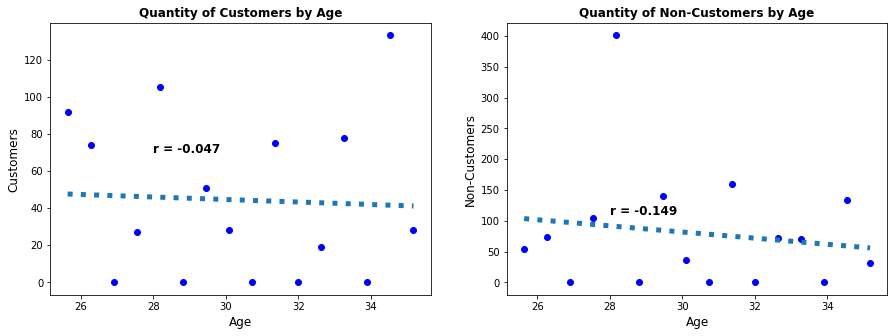

In [64]:
# Plotting two scatters of Customers Age vs Qty of Frequent Flyer
f, axis = plt.subplots(1,2, figsize=(15,5))

# Subplotting Customers by Age
plt.subplot(1,2,1)

# Qty of Frequent Flyer Customers by Age bins
plt.scatter(ages, customers_by_age, color='blue')
z_cust_ages = np.polyfit(ages, customers_by_age, 1)
p_cust_ages = np.poly1d(z_cust_ages)
plt.plot(ages, p_cust_ages(ages), linestyle=':', lw=5)
# Correlation coeff
plt.text(x=28, y=70,s="r = " + str(round(np.corrcoef(ages, customers_by_age)[0][1],3)), 
         fontsize='large', fontweight='bold')

# Setting titles and labels
plt.title('Quantity of Customers by Age', fontweight='bold', fontsize='large')
plt.ylabel("Customers", fontsize='large')
plt.xlabel("Age", fontsize='large')


# Subplotting Non-Customers by Age
plt.subplot(1,2,2)

# Qty of Non-Frequent Flyer Customers by Age bins
plt.scatter(ages, non_customers_by_age, color='blue')
z_non_cust_ages = np.polyfit(ages, non_customers_by_age, 1)
p_non_cust_ages = np.poly1d(z_non_cust_ages)
plt.plot(ages, p_non_cust_ages(ages), linestyle=':', lw=5)
# Correlation coeff
plt.text(x=28, y=110,s="r = " + str(round(np.corrcoef(ages, non_customers_by_age)[0][1],3)), 
         fontsize='large', fontweight='bold')

# Setting titles and labels
plt.title('Quantity of Non-Customers by Age', fontweight='bold', fontsize='large')
plt.ylabel("Non-Customers", fontsize='large')
plt.xlabel("Age", fontsize='large')

# Showing Plot
plt.show()

### Annual Income vs Travel Insurance

We are going to use customer income bins, calculated previuosly

In [65]:
# Freedman-Diaconis rule to find number of bins for Annual Income Column
q1_income = np.quantile(df.AnnualIncome, 0.25)
q3_income = np.quantile(df.AnnualIncome, 0.75)
iqr_income = q3_income - q1_income
bin_width_income = (2 * iqr_income) / (len(df.AnnualIncome) ** (1 / 3))
bin_count_income = int(np.ceil(max(df.AnnualIncome) - min(df.AnnualIncome)) / bin_width_income)

In [66]:
# 15 Customer annual incomes by travel insurance bins
income_travel_ins_bin1 = list(df[(df['AnnualIncome'] < (df['AnnualIncome'].min() + bin_width_income))].TravelInsurance)
for i in range(1,bin_count_income+1):
    globals()['income_travel_ins_bin' + str(i+1)] = list(df[(df['AnnualIncome'] > (df['AnnualIncome'].min() + i*bin_width_income)) & (df['AnnualIncome'] < (df['AnnualIncome'].min() + (i+1)*bin_width_income))].TravelInsurance)

In [67]:
# Number of Customers by Annual Income

for i in range(1,bin_count_income+2):
    globals()['customers_income' + str(i)] = len([1 for i in globals()['income_travel_ins_bin' + str(i)] if i == 1])

customers_by_income = []
for i in range(1,bin_count_income+2):
    customers_by_income.append(globals()['customers_income' + str(i)])


In [68]:
# Number of Non-Customers by Annual Income

for i in range(1,bin_count_income+2):
    globals()['non_customers_income' + str(i)] = len([1 for i in globals()['income_travel_ins_bin' + str(i)] if i == 0])

non_customers_by_income = []
for i in range(1,bin_count_income+2):
    non_customers_by_income.append(globals()['non_customers_income' + str(i)])


In [69]:
# Annual Income bins

incomes = []
for i in range(1,bin_count_income+2):
    incomes.append(df.AnnualIncome.min() + bin_width_income*i)

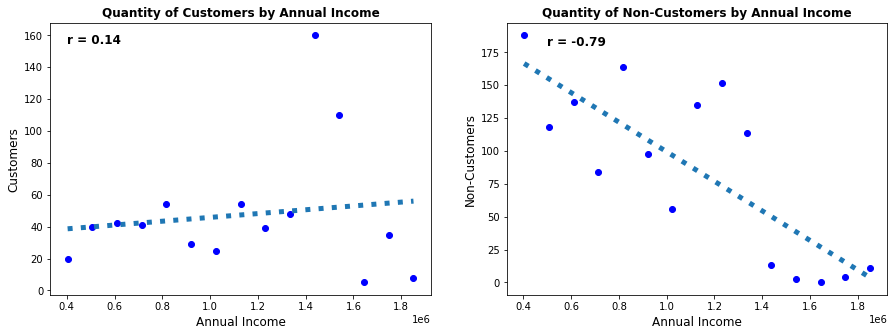

In [70]:
# Plotting two scatters of Customers Age vs Qty of Frequent Flyer
f, axis = plt.subplots(1,2, figsize=(15,5))

# Subplotting Customers by Age
plt.subplot(1,2,1)

# Qty of Frequent Flyer Customers by Age bins
plt.scatter(incomes, customers_by_income, color='blue')
z_cust_incomes = np.polyfit(incomes, customers_by_income, 1)
p_cust_incomes = np.poly1d(z_cust_incomes)
plt.plot(incomes, p_cust_incomes(incomes), linestyle=':', lw=5)
# Correlation coeff
plt.text(x=0.4e6, y=155,s="r = " + str(round(np.corrcoef(incomes, customers_by_income)[0][1],3)), 
         fontsize='large', fontweight='bold')

# Setting titles and labels
plt.title('Quantity of Customers by Annual Income', fontweight='bold', fontsize='large')
plt.ylabel("Customers", fontsize='large')
plt.xlabel("Annual Income", fontsize='large')


# Subplotting Non-Customers by Age
plt.subplot(1,2,2)

# Qty of Non-Frequent Flyer Customers by Age bins
plt.scatter(incomes, non_customers_by_income, color='blue')
z_non_cust_incomes = np.polyfit(incomes, non_customers_by_income, 1)
p_non_cust_incomes = np.poly1d(z_non_cust_incomes)
plt.plot(incomes, p_non_cust_incomes(incomes), linestyle=':', lw=5)
# Correlation coeff
plt.text(x=0.5e6, y=180,s="r = " + str(round(np.corrcoef(incomes, non_customers_by_income)[0][1],3)), 
         fontsize='large', fontweight='bold')

# Setting titles and labels
box = {'facecolor':'0.75','edgecolor':'k','boxstyle':'round'}
plt.title('Quantity of Non-Customers by Annual Income', fontweight='bold', fontsize='large')
plt.ylabel("Non-Customers", fontsize='large')
plt.xlabel("Annual Income", fontsize='large')

# Showing Plot
plt.show()

### Age vs Annual Income

In [71]:
# Freedman-Diaconis rule to find number of bins for Age Column
q1_age = np.quantile(df.Age, 0.25)
q3_age = np.quantile(df.Age, 0.75)
iqr_age = q3_age - q1_age
bin_width_age = (2 * iqr_age) / (len(df.Age) ** (1 / 3))
bin_count_age = int(np.ceil(max(df.Age) - min(df.Age)) / bin_width_age)

In [72]:
bin_width_age,bin_count_age

(0.6363421602417328, 15)

In [73]:
# Lists of Ages segmentation 

# 16 Customer ages by annual income bins
customer_age_income_bin1 = list(df[(df['TravelInsurance'] == 1) & (df['Age'] < (df['Age'].min() + bin_width_age))].AnnualIncome)
for i in range(1,bin_count_age+3):
    globals()['customer_age_income_bin' + str(i+1)] = list(df[(df['TravelInsurance'] == 1) & (df['Age'] > (df['Age'].min() + i*bin_width_age)) & (df['Age'] < (df['Age'].min() + (i+1)*bin_width_age))].AnnualIncome)

# 16 Customer ages by annual income bins
non_customer_age_income_bin1 = list(df[(df['TravelInsurance'] == 0) & (df['Age'] < (df['Age'].min() + bin_width_age))].AnnualIncome)
for i in range(1,bin_count_age+3):
    globals()['non_customer_age_income_bin' + str(i+1)] = list(df[(df['TravelInsurance'] == 0) & (df['Age'] > (df['Age'].min() + i*bin_width_age)) & (df['Age'] < (df['Age'].min() + (i+1)*bin_width_age))].AnnualIncome)


In [74]:
# Function to calculate median, mean, mode and std dev for customers age by annual income segmentation
def cust_age_income(x):
    if len(x) > 0:
        cust_age_income_medians.append(np.quantile(x,0.5))
        cust_age_income_means.append(np.mean(x))
        cust_age_income_modes.append(st.mode(x))
        cust_age_income_stds.append(np.std(x))
    else:
        cust_age_income_medians.append(round(np.quantile(cust_age_income_medians,0.5),1))
        cust_age_income_means.append(round(np.quantile(cust_age_income_means,0.5),1))
        cust_age_income_modes.append(round(np.quantile(cust_age_income_modes,0.5),1))
        cust_age_income_stds.append(round(np.quantile(cust_age_income_stds,0.5),1))

# Lists to store medians, means, modes and std devs for customers age, the length of lists will be the number of
# segmentations 
cust_age_income_medians = []
cust_age_income_means = []
cust_age_income_modes = []
cust_age_income_stds = []

# Applying function to each customer age lists by annual income
for i in range(1,bin_count_age+2):
    cust_age_income(globals()['customer_age_income_bin' + str(i)])

In [75]:
# Function to calculate median, mean, mode and std dev for customers age by annual income segmentation
def non_cust_age_income(x):
    if len(x) > 0:
        non_cust_age_income_medians.append(np.quantile(x,0.5))
        non_cust_age_income_means.append(np.mean(x))
        non_cust_age_income_modes.append(st.mode(x))
        non_cust_age_income_stds.append(np.std(x))
    else:
        non_cust_age_income_medians.append(round(np.quantile(non_cust_age_income_medians,0.5),1))
        non_cust_age_income_means.append(round(np.quantile(non_cust_age_income_means,0.5),1))
        non_cust_age_income_modes.append(round(np.quantile(non_cust_age_income_modes,0.5),1))
        non_cust_age_income_stds.append(round(np.quantile(non_cust_age_income_stds,0.5),1))

# Lists to store medians, means, modes and std devs for non-customers age, the length of lists 
# will be the number of segmentations 
non_cust_age_income_medians = []
non_cust_age_income_means = []
non_cust_age_income_modes = []
non_cust_age_income_stds = []    

# Applying function to each non-customer age lists by annual income
for i in range(1,bin_count_age+2):
    non_cust_age_income(globals()['non_customer_age_income_bin' + str(i)])

In [76]:
# Bins of Ages for both Customers and Non-customers
ages = [df.Age.min() + bin_width_age*i for i in range(2,bin_count_age+3)]

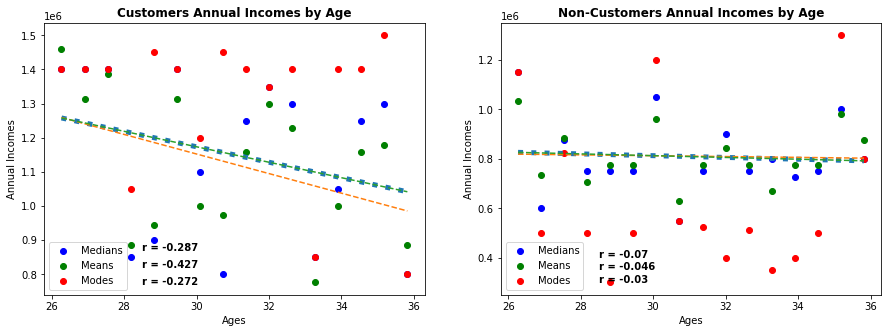

In [77]:
# Plots of statistical parameters of customer and non-customer ages by annual income

f, axis = plt.subplots(1,2, figsize=(15,5))

# Plotting a customer's statistical parameters
plt.subplot(1,2,1)

# Customer medians
plt.scatter(ages, cust_age_income_medians, color='blue', label='Medians')
z_age_medians_cust = np.polyfit(ages, cust_age_income_medians, 1)
p_age_medians_cust = np.poly1d(z_age_medians_cust)
plt.plot(ages, p_age_medians_cust(ages), linestyle=':', lw=5)
# Correlation coeff
plt.text(x=28.5,
         y=0.87e6,
         s="r = " + str(round(np.corrcoef(ages, cust_age_income_medians)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Customer means
plt.scatter(ages, cust_age_income_means, color='green', label='Means')
z_age_means_cust = np.polyfit(ages, cust_age_income_means, 1)
p_age_means_cust = np.poly1d(z_age_means_cust)
plt.plot(ages, p_age_means_cust(ages), linestyle='--')
# Correlation coeff
plt.text(x=28.5,
         y=0.82e6,
         s="r = " + str(round(np.corrcoef(ages, cust_age_income_means)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Customer modes
plt.scatter(ages, cust_age_income_modes, color='red', label='Modes')
z_age_modes_cust = np.polyfit(ages, cust_age_income_modes, 1)
p_age_modes_cust = np.poly1d(z_age_medians_cust)
plt.plot(ages, p_age_modes_cust(ages), linestyle='--')
# Correlation coeff
plt.text(x=28.5,
         y=0.77e6,
         s="r = " + str(round(np.corrcoef(ages, cust_age_income_modes)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Setting titles and labels
plt.title('Customers Annual Incomes by Age', fontweight='bold')
plt.ylabel("Annual Incomes")
plt.xlabel("Ages")
plt.legend()

# Plotting a non-customer's statistical parameters
plt.subplot(1,2,2)


# <--------------------------------------------------------------------------------------------------------->

# Non-customer medians
plt.scatter(ages, non_cust_age_income_medians, color='blue', label='Medians')
z_age_medians_non_customers = np.polyfit(ages, non_cust_age_income_medians, 1)
p_age_medians_non_customers = np.poly1d(z_age_medians_non_customers)
plt.plot(ages, p_age_medians_non_customers(ages), linestyle=':', lw=5)
# Correlation coeff
plt.text(x=28.5,
         y=0.4e6,
         s="r = " + str(round(np.corrcoef(ages, non_cust_age_income_medians)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Non-customer means
plt.scatter(ages, non_cust_age_income_means, color='green', label='Means')
z_age_means_non_customers = np.polyfit(ages, non_cust_age_income_means, 1)
p_age_means_non_customers = np.poly1d(z_age_means_non_customers)
plt.plot(ages, p_age_means_non_customers(ages), linestyle='--')
# Correlation coeff
plt.text(x=28.5,
         y=0.35e6,
         s="r = " + str(round(np.corrcoef(ages, non_cust_age_income_means)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Non-customer modes
plt.scatter(ages, non_cust_age_income_modes, color='red', label='Modes')
z_age_modes_non_customers = np.polyfit(ages, non_cust_age_income_modes, 1)
p_age_modes_non_customers = np.poly1d(z_age_medians_non_customers)
plt.plot(ages, p_age_modes_non_customers(ages), linestyle='--')
# Correlation coeff
plt.text(x=28.5,
         y=0.3e6,
         s="r = " + str(round(np.corrcoef(ages, non_cust_age_income_modes)[0][1],3)), 
         fontsize='medium', fontweight='bold')

# Setting titles and labels
plt.title('Non-Customers Annual Incomes by Age', fontweight='bold')
plt.ylabel("Annual Incomes")
plt.xlabel("Ages")
plt.legend()

# Showing plot
plt.show()

## Final recommendations

 As we see there are more non-customers than customers, but the average income for customers is 37.8% above the income for non-customers. Thus it is necessary to:

- Negotiate with Government Sector a travel insurance plan with discounts for their employees, offering low-cost plans, payroll deductions, interest-free month.

## Recommendations about data collection

Collect data about:

- Customer professions
- Marital status
- If they have kids
- Airlines preferred
- Gender